### Preperations

Lets first import the relevant libraries and then load the data into the dataframe df

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
df = pd.read_csv("../data/King_County_House_prices_dataset.csv")

### Price Dependency on Zip Code

Now I want to look if the price depends on the zip code. First I want to get an overview of the data by 
1. grouping the houses with the same zip code together, calculating their mean value and sorting them on the price.
1. Next, I am creating a new dataframe from this Series, and turning the zipcodes into strings
1. Last, I want to plot this new dataframe as a scatterplot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show(close=None, block=None)>

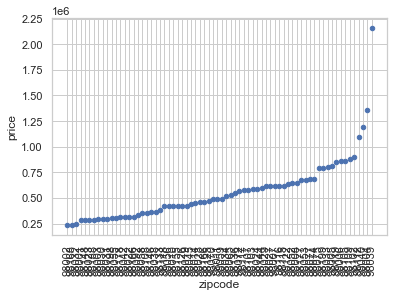

In [286]:
#1
sorted_df = df.groupby('zipcode').price.mean().sort_values()
#2
df_sorted_df = pd.DataFrame({'zipcode':sorted_df.index, 'price':sorted_df.values})
df_sorted_df['zipcode'] = df_sorted_df['zipcode'].apply(str)
#3
fig = df_sorted_df.plot(kind='scatter', x='zipcode', y='price')
for tick in fig.get_xticklabels():
    tick.set_rotation(90)
   
plt.show



We can see here that different zip codes clearly have different average prices. Four zip codes seem to be exceptionally expensive. Furthermore, there seems to be one cluster of zip codes that are separated by the others by a jump in the price. 

We have a good hint that the zip codes influences the price. Since the zipcode is a categorical value we have to use dummy variables in otder to make linear regression:

1. Copying the dataframe into a new dataframe to avoid changes in the original one
1. create dummy variables for the zipcode
1. Creating a new dataframe with only the price as one columns. Then adding the zip_dummies to this new dataframe

In [287]:
#1
df_edit = df
#2
zip_dummies = pd.get_dummies(data=df_edit['zipcode'], prefix='zip', drop_first=True)
#3
df_price = df.price
df_price = pd.DataFrame({'price':df_price.values})
df_edit = pd.concat([df_price, zip_dummies], axis=1)

df_edit.head()

price  zip_98002  zip_98003  zip_98004  zip_98005  zip_98006  zip_98007  \
0  221900.0          0          0          0          0          0          0   
1  538000.0          0          0          0          0          0          0   
2  180000.0          0          0          0          0          0          0   
3  604000.0          0          0          0          0          0          0   
4  510000.0          0          0          0          0          0          0   

   zip_98008  zip_98010  zip_98011  ...  zip_98146  zip_98148  zip_98155  \
0          0          0          0  ...          0          0          0   
1          0          0          0  ...          0          0          0   
2          0          0          0  ...          0          0          0   
3          0          0          0  ...          0          0          0   
4          0          0          0  ...          0          0          0   

   zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  zip_98198  zip_98199  
0          0          0          0          1          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 70 columns]

As an example I will plot two of the zip codes:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


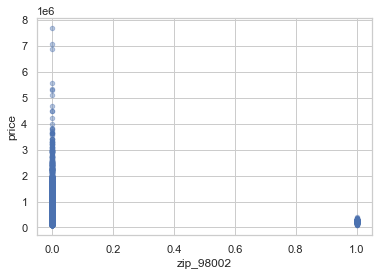

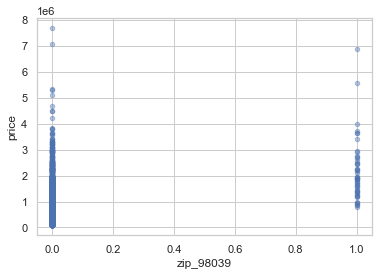

In [288]:
fig = df_edit.plot(kind='scatter', x='zip_98002', y='price', alpha=0.4)
fig = df_edit.plot(kind='scatter', x='zip_98039', y='price', alpha=0.4)
#die idee war alle auf einmal zu nehmen. 

In [289]:
X = df_edit.drop(['price'], axis=1)
y = df_edit.price
X = sm.add_constant(X)
model = sm.OLS(y, X)

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     214.4
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:45:31   Log-Likelihood:            -3.0174e+05
No. Observations:               21597   AIC:                         6.036e+05
Df Residuals:                   21527   BIC:                         6.042e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.812e+05   1.49e+04     18.860      0.000    2.52e+05     3.1e+05
zip_98002  -4.691e+04    2.5e+04     -1.876      0.061   -9.59e+04    2113.935
zip_98003   1.292e+04   2.26e+04      0.573      0.567   -3.13e+04    5.71e+04
zip_98004   1.075e+06   2.18e+04     49.315      0.000    1.03e+06    1.12e+06
zip_98005   5.291e+05   2.65e+04     19.998      0.000    4.77e+05    5.81e+05
zip_98006   5.787e+05   1.96e+04     29.555      0.000     5.4e+05    6.17e+05
zip_98007   3.361e+05   2.81e+04     11.945      0.000    2.81e+05    3.91e+05
zip_98008   3.644e+05   2.25e+04     16.203      0.000     3.2e+05    4.09e+05
zip_98010   1.425e+05    3.2e+04      4.450      0.000    7.97e+04    2.05e+05
zip_98011   2.092e+05   2.52e+04      8.309      0.000     1.6e+05    2.59e+05
zip_98014   1.744e+05   2.95e+04      5.915      0.000    1.17e+05    2.32e+05
zip_98019   1.436e+05   2.54e+04      5.656      0.000    9.39e+04    1.93e+05
zip_98022   3.555e+04   2.38e+04      1.493      0.135   -1.11e+04    8.22e+04
zip_98023   5547.9418   1.96e+04      0.283      0.777   -3.28e+04    4.39e+04
zip_98024   3.049e+05    3.5e+04      8.711      0.000    2.36e+05    3.74e+05
zip_98027   3.359e+05   2.04e+04     16.445      0.000    2.96e+05    3.76e+05
zip_98028   1.813e+05   2.25e+04      8.060      0.000    1.37e+05    2.25e+05
zip_98029   3.314e+05   2.17e+04     15.251      0.000    2.89e+05    3.74e+05
zip_98030   1.499e+04   2.31e+04      0.648      0.517   -3.04e+04    6.04e+04
zip_98031   1.915e+04   2.27e+04      0.843      0.399   -2.54e+04    6.37e+04
zip_98032   -2.99e+04   2.94e+04     -1.017      0.309   -8.75e+04    2.77e+04
zip_98033   5.228e+05   2.02e+04     25.880      0.000    4.83e+05    5.62e+05
zip_98034   2.405e+05   1.92e+04     12.513      0.000    2.03e+05    2.78e+05
zip_98038    8.59e+04   1.89e+04      4.536      0.000    4.88e+04    1.23e+05
zip_98039    1.88e+06   4.27e+04     43.982      0.000     1.8e+06    1.96e+06
zip_98040   9.137e+05   2.25e+04     40.582      0.000     8.7e+05    9.58e+05
zip_98042   3.039e+04   1.92e+04      1.582      0.114   -7267.339     6.8e+04
zip_98045    1.59e+05   2.42e+04      6.564      0.000    1.12e+05    2.07e+05
zip_98052    3.64e+05    1.9e+04     19.131      0.000    3.27e+05    4.01e+05
zip_98053    3.96e+05   2.05e+04     19.291      0.000    3.56e+05    4.36e+05
zip_98055   2.307e+04   2.28e+04      1.010      0.313   -2.17e+04    6.78e+04
zip_98056   1.397e+05   2.05e+04      6.817      0.000    9.95e+04     1.8e+05
zip_98058   7.242e+04      2e+04      3.627      0.000    3.33e+04    1.12e+05
zip_98059   2.124e+05   1.98e+04     10.705      0.000    1.74e+05    2.51e+05
zip_98065   2.484e+05    2.2e+04     11.306      0.000    2.05e+05    2.92e+05
zip_98070   2.082e+05   3.01e+04      6.908      0.000    1.49e+05    2.67e+05
zi

Lets re-plot the mean values of price sorted by the zipcode again:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='zipcode', ylabel='price'>

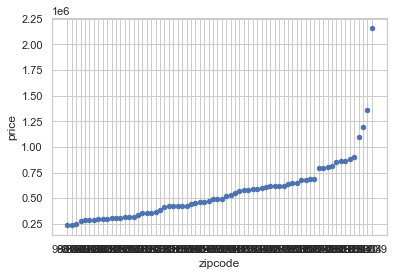

In [290]:
df_sorted_df.plot(kind='scatter', x='zipcode', y='price')


Can we make a regression model with these data?

I will assign each zipcode an index

In [291]:
labels = pd.factorize(df_sorted_df.zipcode)

df_sorted_df['idx_zipcode']=labels[0]
df_sorted_df


zipcode         price  idx_zipcode
0    98002  2.342840e+05            0
1    98168  2.403284e+05            1
2    98032  2.512962e+05            2
3    98001  2.811949e+05            3
4    98148  2.849086e+05            4
..     ...           ...          ...
65   98102  8.996077e+05           65
66   98112  1.096239e+06           66
67   98040  1.194874e+06           67
68   98004  1.356524e+06           68
69   98039  2.161300e+06           69

[70 rows x 3 columns]

In [292]:
smf.ols(formula='price ~ idx_zipcode', data=df_sorted_df).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     154.6
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           3.54e-19
Time:                        21:45:31   Log-Likelihood:                -940.68
No. Observations:                  70   AIC:                             1885.
Df Residuals:                      68   BIC:                             1890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.338e+05   3.98e+04      3.360      0.001    5.43e+04    2.13e+05
idx_zipcode  1.238e+04    995.887     12.434      0.000    1.04e+04    1.44e+04
==============================================================================
Omnibus:                      114.385   Durbin-Watson:                   0.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3533.363
Skew:                           5.214   Prob(JB):                         0.00
Kurtosis:                      36.207   Cond. No.                         79.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this model I found good values for t, P>|t|, and R<sup>2</sup>. However, I am not sure if this process is correct...

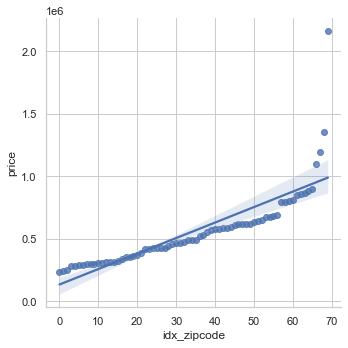

In [293]:
sns.lmplot(data=df_sorted_df, x='idx_zipcode', y='price')

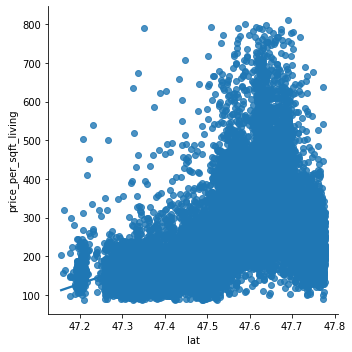

In [ ]:
sns.lmplot(data=df, x='lat', y='price_per_sqft_living')


Lets try out something else: I want to to make a map that has long and lat on their axes and the zipcode as a hue colour. 
then categorize the zipcodes based on their mean price and also make means of the lat and long (they should have a mean-value)

also include the waterfront. maybe you can see here, that the waterfront houses are in rich neighbourhoods. 



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='long', ylabel='lat'>

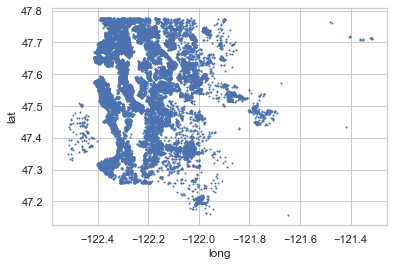

In [294]:
df.plot(kind='scatter', x='long',y='lat', s=1)

/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


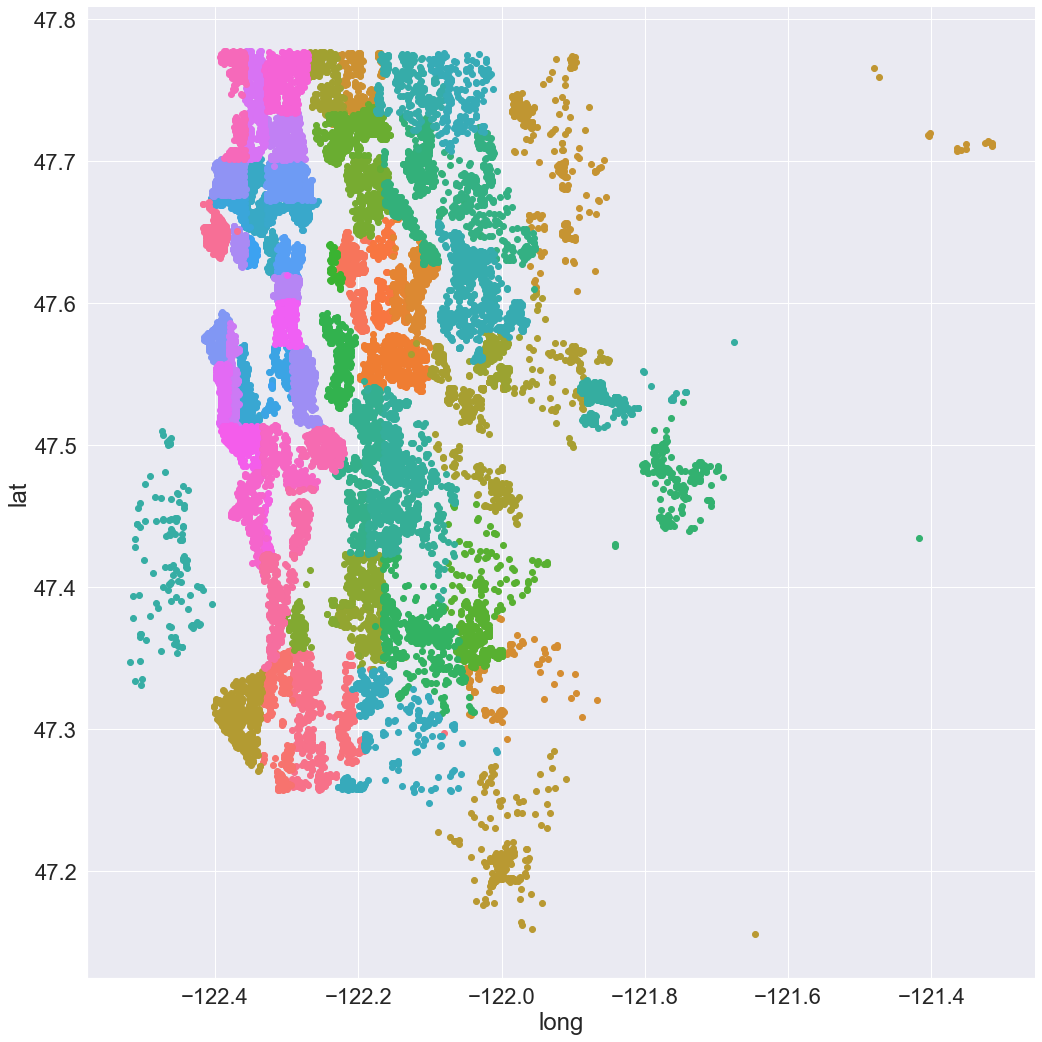

In [495]:

#sns.set(font_scale=2)
g = sns.FacetGrid(df, hue="zipcode",size=15)
g.map(plt.scatter, "long", "lat")
#g.add_legend()

#g.legend(fontsize=2,bbox_to_anchor=(0, 1.1))
#g.set_xlabel('long',fontsize=3);
#g.set_ylabel('lat',fontsize=3);


Now I want to make a second plot, that uses as hue the existnce of a waterfront.

/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


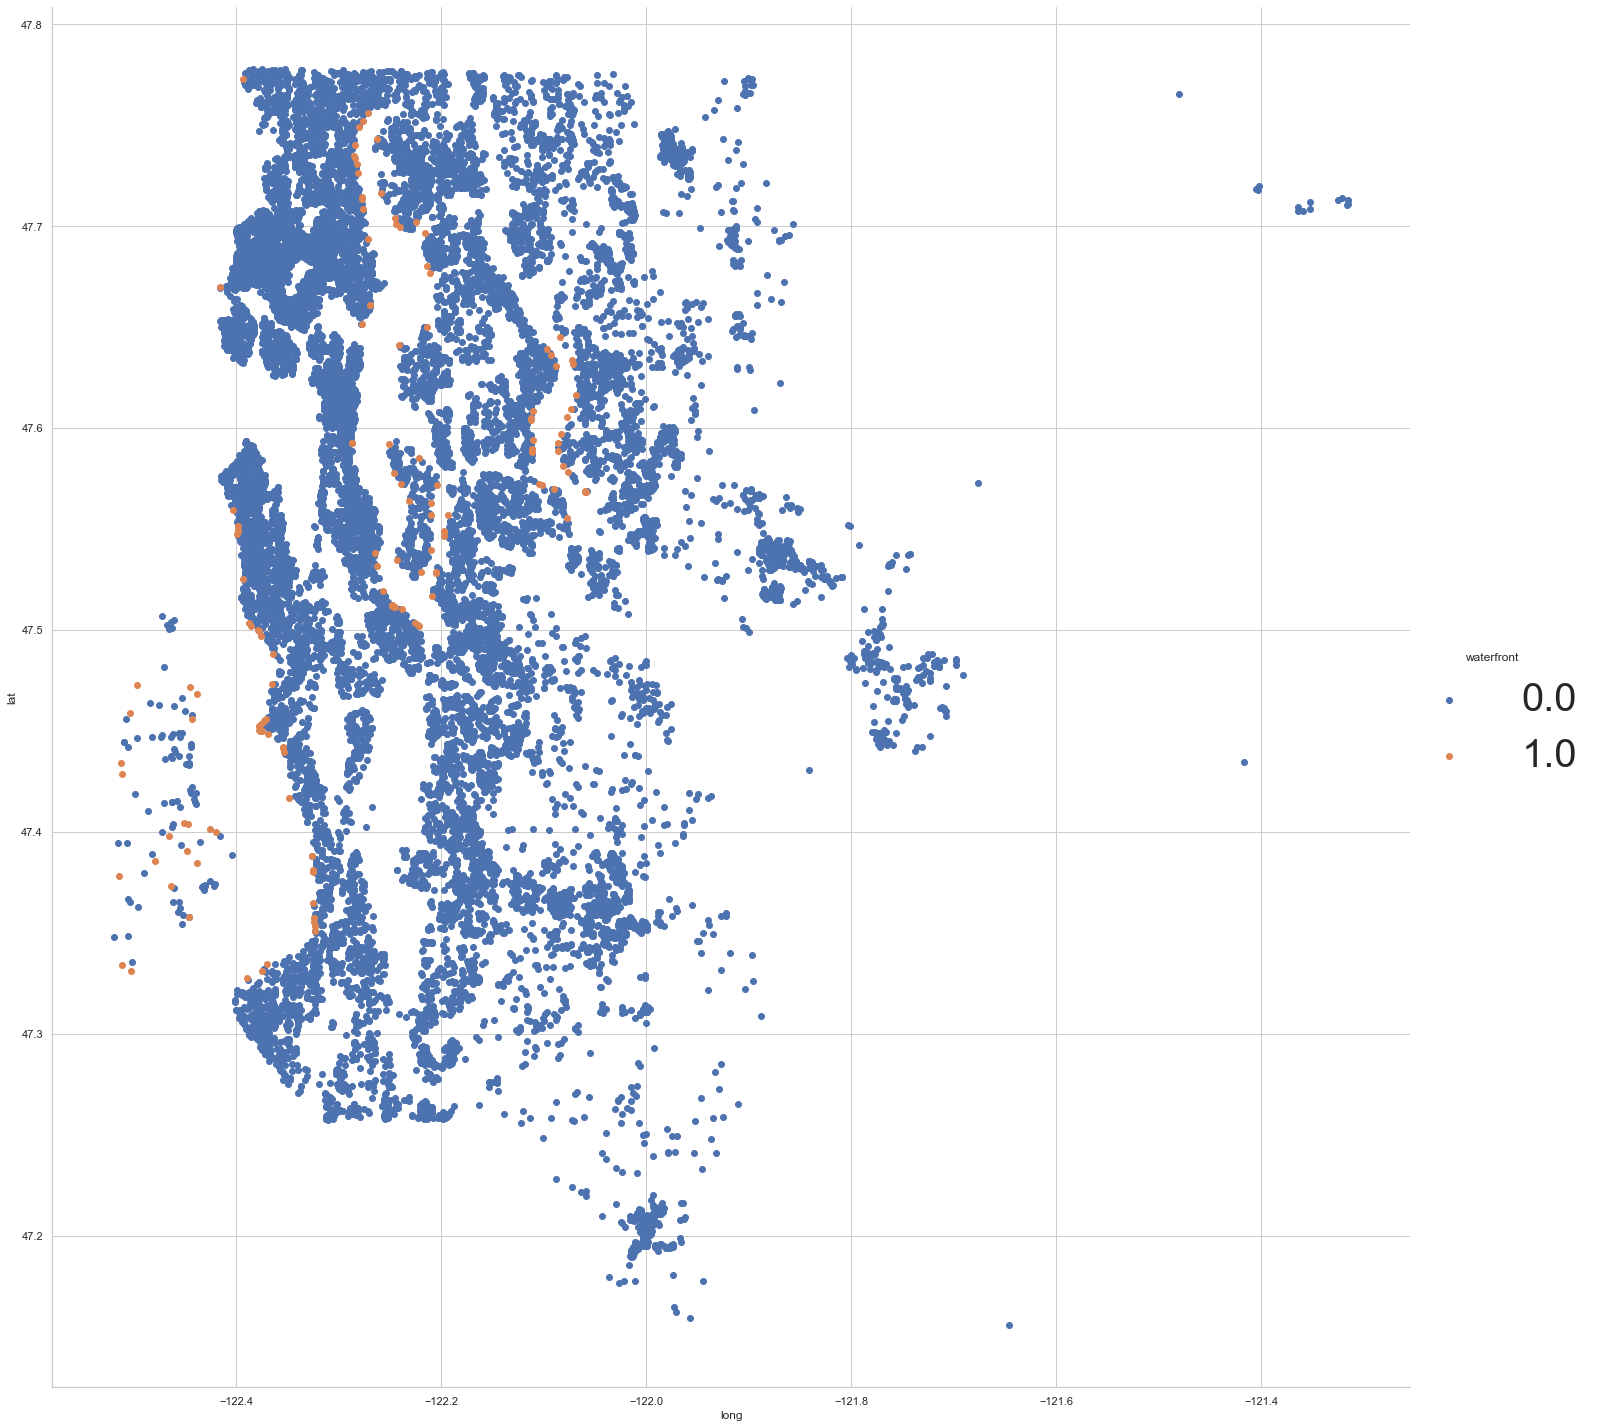

In [502]:
g = sns.FacetGrid(df, hue="waterfront",size=20)
g.map(plt.scatter, "long", "lat")
g.add_legend(fontsize=40)

Now I want to check if these houses lie in expensive zip codes

First, I want to create another column in the dataset: price/sqft_livingspace. Then for that I want to group the data into the zipcodes and calculate the means for every column and create a new dataframe out of that. I want to categorise the zipcodes in 10 different price areas. theses indices I want to transfer to the original df in a new column, price category. 

also I want to plot where are the really tall houses. they are probably cheap per sqft. 

In [5]:
#Adding a column price/sqft_living
df['price_per_sqft_living']=df.price / df.sqft_living
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0          5650     1.0         NaN   0.0  ...        1180            0.0   
1          7242     2.0         0.0   0.0  ...        2170          400.0   
2         10000     1.0         0.0   0.0  ...         770            0.0   
3          5000     1.0         0.0   0.0  ...        1050          910.0   
4          8080     1.0         0.0   0.0  ...        1680            0.0   
...         ...     ...         ...   ...  ...         ...            ...   
21592      1131     3.0         0.0   0.0  ...        1530            0.0   
21593      5813     2.0         0.0   0.0  ...        2310            0.0   
21594      1350     2.0         0.0   0.0  ...        1020            0.0   
21595      2388     2.0         NaN   0.0  ...        1600            0.0   
21596      1076     2.0         0.0   0.0  ...        1020            0.0   

       yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955          0.0    98178  47.5112 -122.257           1340   
1          1951       1991.0    98125  47.7210 -122.319           1690   
2          1933          NaN    98028  47.7379 -122.233           2720   
3          1965          0.0    98136  47.5208 -122.393           1360   
4          1987          0.0    98074  47.6168 -122.045           1800   
...         ...          ...      ...      ...      ...            ...   
21592      2009          0.0    98103  47.6993 -122.346           1530   
21593      2014          0.0    98146  47.5107 -122.362           1830   
21594      2009          0.0    98144  47.5944 -122.299           1020   
21595      2004          0.0    98027  47.5345 -122.069           1410   
21596      2008          0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  price_per_sqft_living  
0            5650             188.050847  
1            7639             209.338521  
2            8062             233.766234  
3            5000             308.163265  
4            7503             303.571429  
...           ...                    ...  
21592        1509             235.294118  
21593        7200             173.160173  
21594        2007             394.216667  
21595        1287             250.000000  
21596        1357             318.627451  

[21597 rows x 22 columns]

In [298]:
#adding a column of price_per_sqft_living categories to the dataset
df['price_per_sqft_living_wider_category'] = pd.cut(df.price_per_sqft_living, bins=4, right=True, labels=False, retbins=False, precision=3, include_lowest=True, duplicates='raise', ordered=True)
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0          5650     1.0         NaN   0.0  ...            0.0      1955   
1          7242     2.0         0.0   0.0  ...          400.0      1951   
2         10000     1.0         0.0   0.0  ...            0.0      1933   
3          5000     1.0         0.0   0.0  ...          910.0      1965   
4          8080     1.0         0.0   0.0  ...            0.0      1987   
...         ...     ...         ...   ...  ...            ...       ...   
21592      1131     3.0         0.0   0.0  ...            0.0      2009   
21593      5813     2.0         0.0   0.0  ...            0.0      2014   
21594      1350     2.0         0.0   0.0  ...            0.0      2009   
21595      2388     2.0         NaN   0.0  ...            0.0      2004   
21596      1076     2.0         0.0   0.0  ...            0.0      2008   

       yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
0               0.0   98178  47.5112 -122.257           1340        5650   
1            1991.0   98125  47.7210 -122.319           1690        7639   
2               NaN   98028  47.7379 -122.233           2720        8062   
3               0.0   98136  47.5208 -122.393           1360        5000   
4               0.0   98074  47.6168 -122.045           1800        7503   
...             ...     ...      ...      ...            ...         ...   
21592           0.0   98103  47.6993 -122.346           1530        1509   
21593           0.0   98146  47.5107 -122.362           1830        7200   
21594           0.0   98144  47.5944 -122.299           1020        2007   
21595           0.0   98027  47.5345 -122.069           1410        1287   
21596           0.0   98144  47.5941 -122.299           1020        1357   

       price_per_sqft_living  price_per_sqft_living_wider_category  
0                 188.050847                                     0  
1                 209.338521                                     0  
2                 233.766234                                     0  
3                 308.163265                                     1  
4                 303.571429                                     1  
...                      ...                                   ...  
21592             235.294118                                     0  
21593             173.160173                                     0  
21594             394.216667                                     1  
21595             250.000000                                     0  
21596             318.627451                                     1  

[21597 rows x 23 columns]

Now I can use this category to plot a variable that represents the price on the map. 

In [299]:
##sns.set_theme(style="whitegrid")

#f, ax = plt.subplots(figsize=(20, 20))
#sns.despine(f, left=True, bottom=True)
#clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
#sns.scatterplot(x="long", y="lat",
#                hue="price_per_sqft_living_wider_category",
#                palette="ch:r=-.2,d=.3_r",
#                hue_order=clarity_ranking,
#                sizes=(1, 8), linewidth=0,
#                data=df, ax=ax)

/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


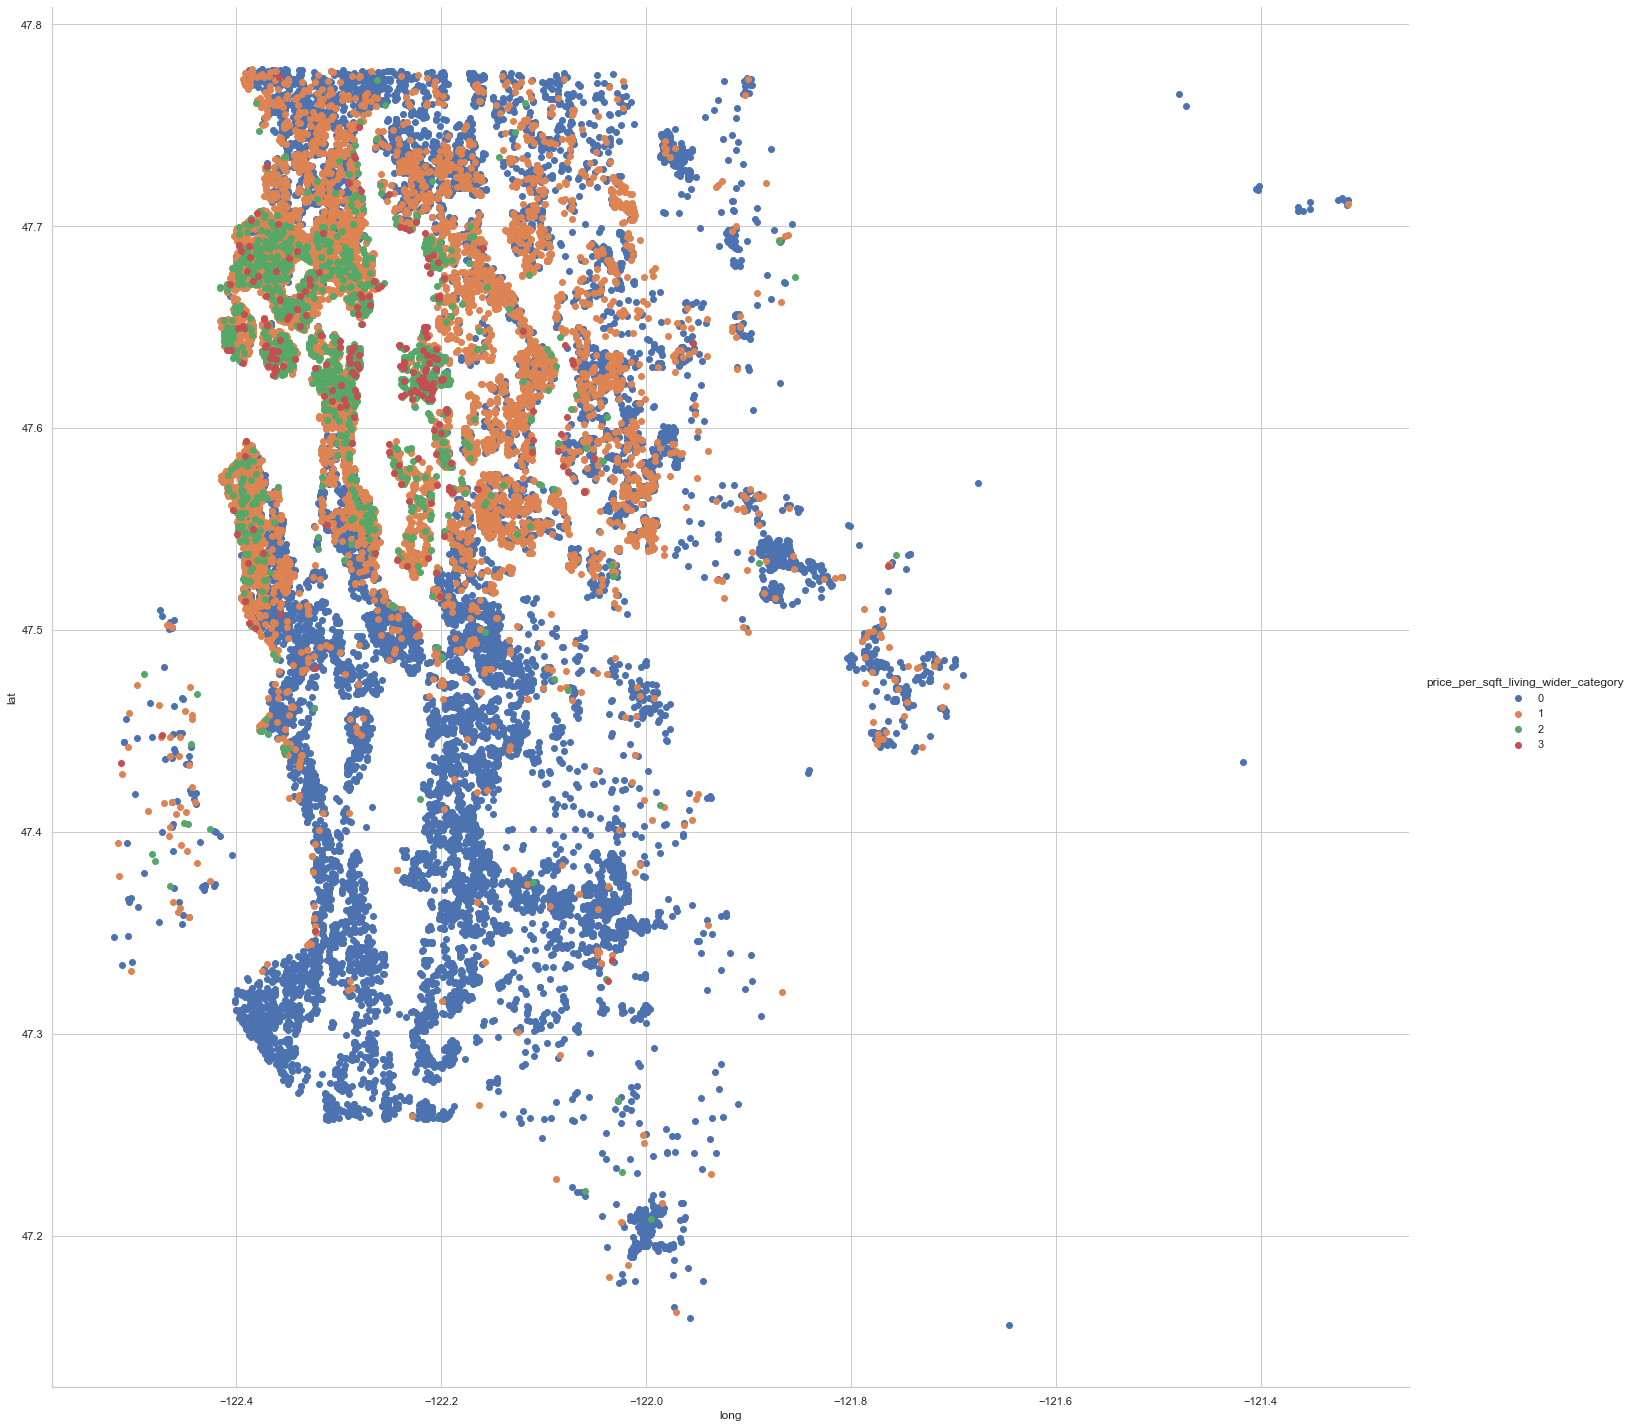

In [300]:
g = sns.FacetGrid(df, hue="price_per_sqft_living_wider_category",size=20)
g.map(plt.scatter, "long", "lat")
g.add_legend()

/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


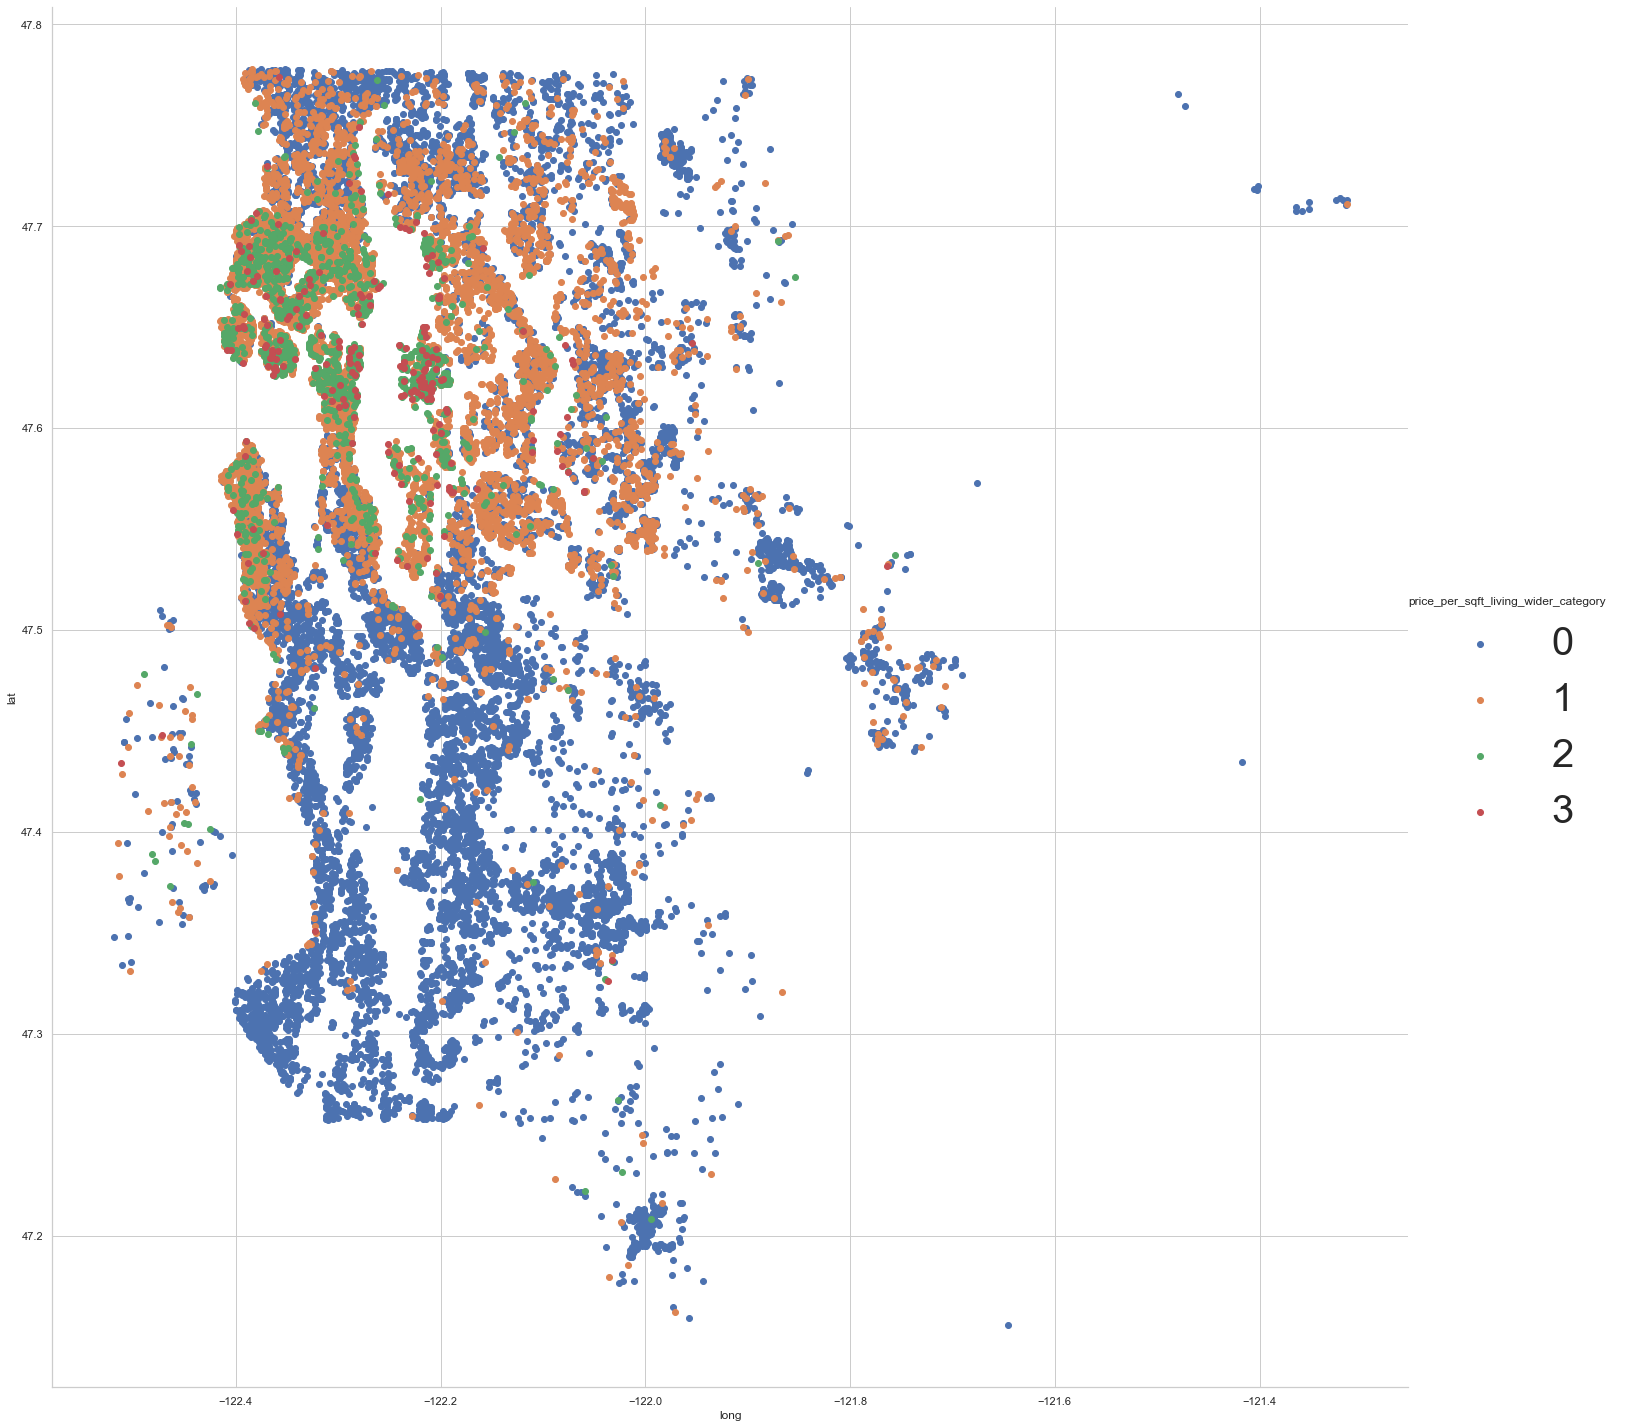

In [500]:
sns.set_theme(style="whitegrid")

g = sns.FacetGrid(df, hue="price_per_sqft_living_wider_category",size=20)
g.map(plt.scatter, "long", "lat")
#plt.setp(g._legend.get_title(), fontsize=20)
g.add_legend(fontsize=40)

what else defines a poor neighbourhood? rennovations are probably long ago. the year of renovation might have an influence on the price. Lets first take a look at the year of rennovation:

<AxesSubplot:ylabel='Frequency'>

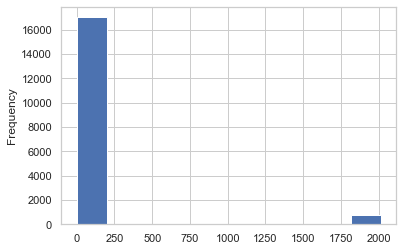

In [301]:
df.yr_renovated.plot(kind='hist')

We see many houses with a 0. Either it is not clear when they were renovated or they have never been renovated. Lets take a look where these houses are, on a map:

In [302]:
#create a category in the dataframe, that tells about the renovation 
no_renovation = pd.cut(df.yr_renovated, bins=2, right=True, labels=False, retbins=False, precision=3, include_lowest=True, duplicates='raise', ordered=True)
df['renovated'] = no_renovation


/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


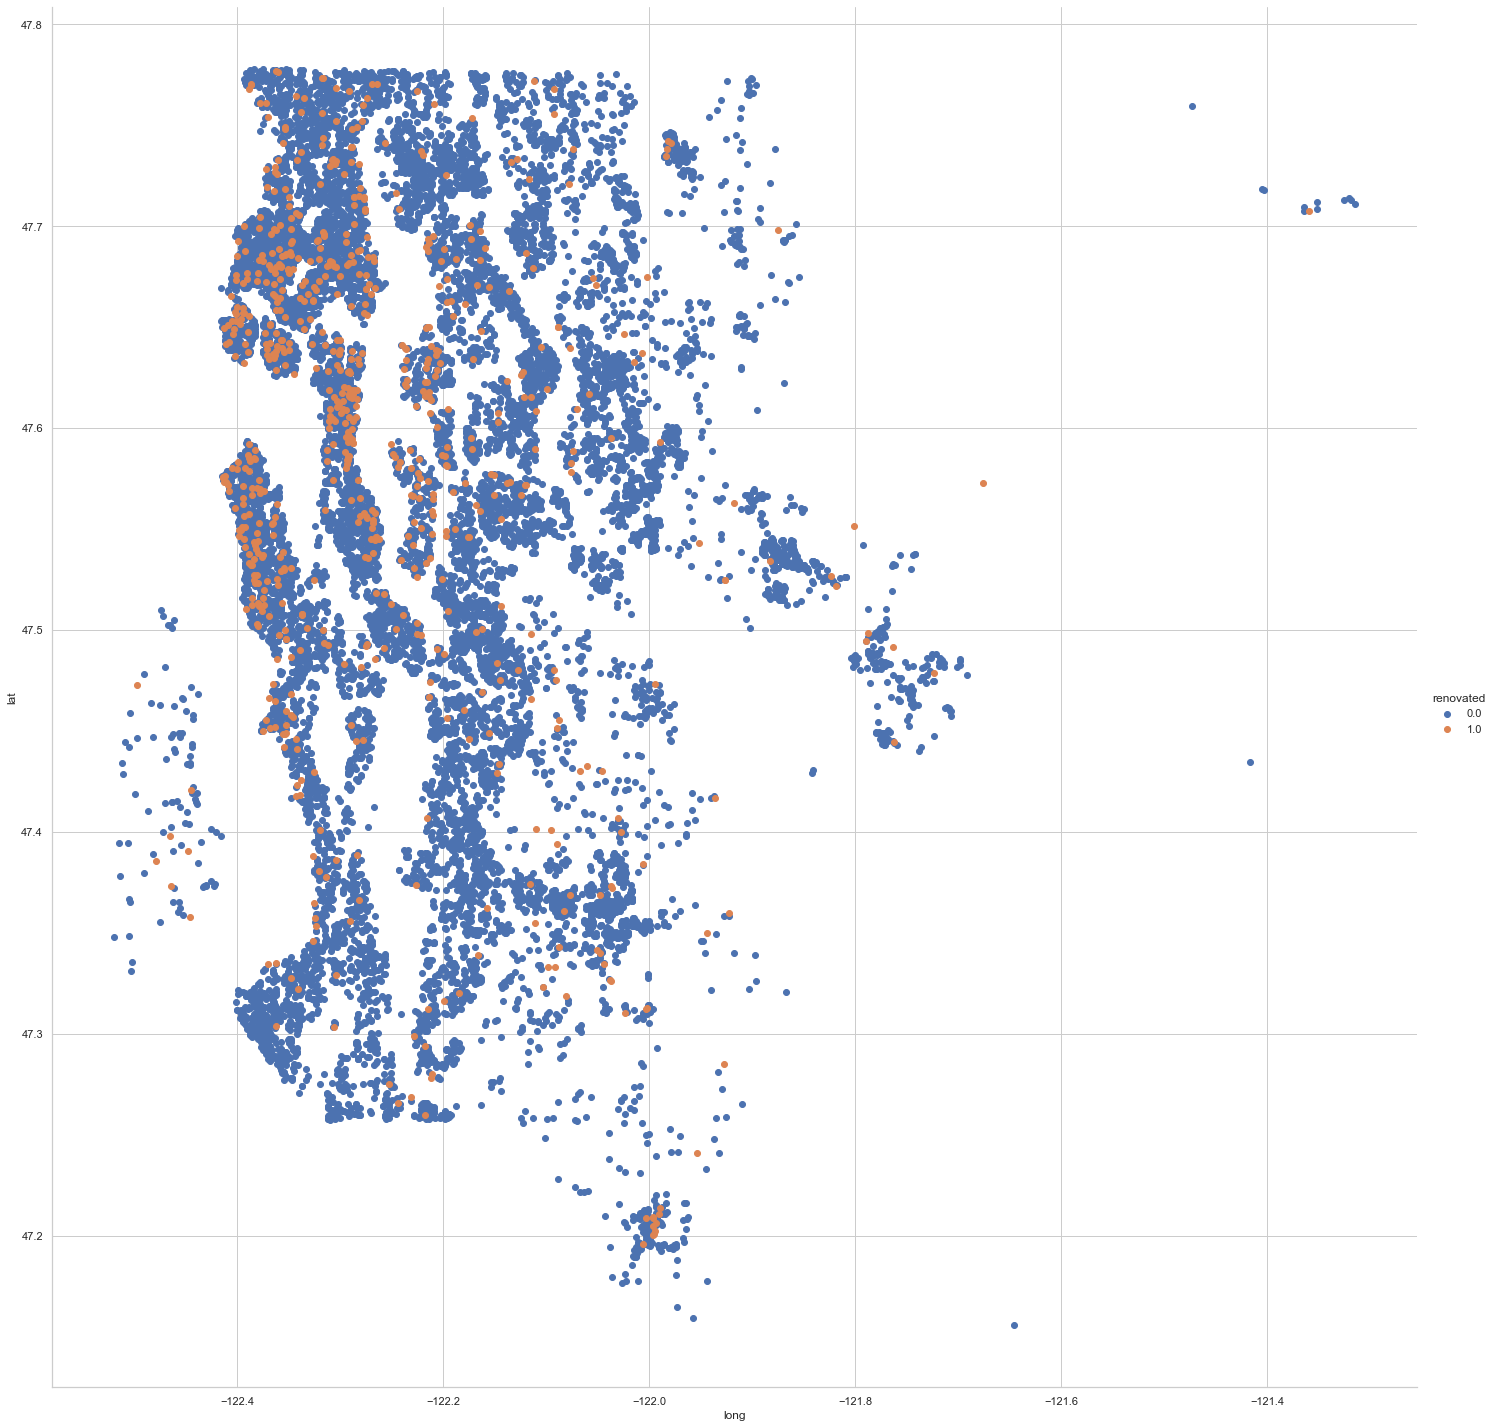

In [303]:
g = sns.FacetGrid(df, hue="renovated",size=20)
g.map(plt.scatter, "long", "lat")
g.add_legend()

The map-distribution of rennovation state follows the  distribution of the rich neighbourhoods. 

what about the year the house was build?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='yr_built', ylabel='yr_build_cat'>

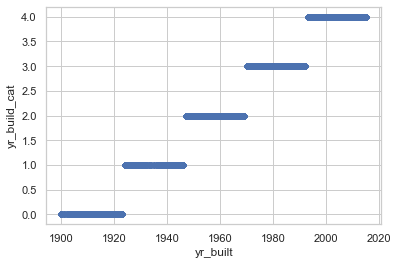

In [304]:
#create a category in the dataframe, that tells about the renovation 
yr_build_cat = pd.cut(df.yr_built, bins=5, right=True, labels=False, retbins=False, precision=3, include_lowest=True, duplicates='raise', ordered=True)
df['yr_build_cat'] = yr_build_cat
df.plot(kind='scatter', x='yr_built',y='yr_build_cat')


<AxesSubplot:xlabel='long', ylabel='lat'>

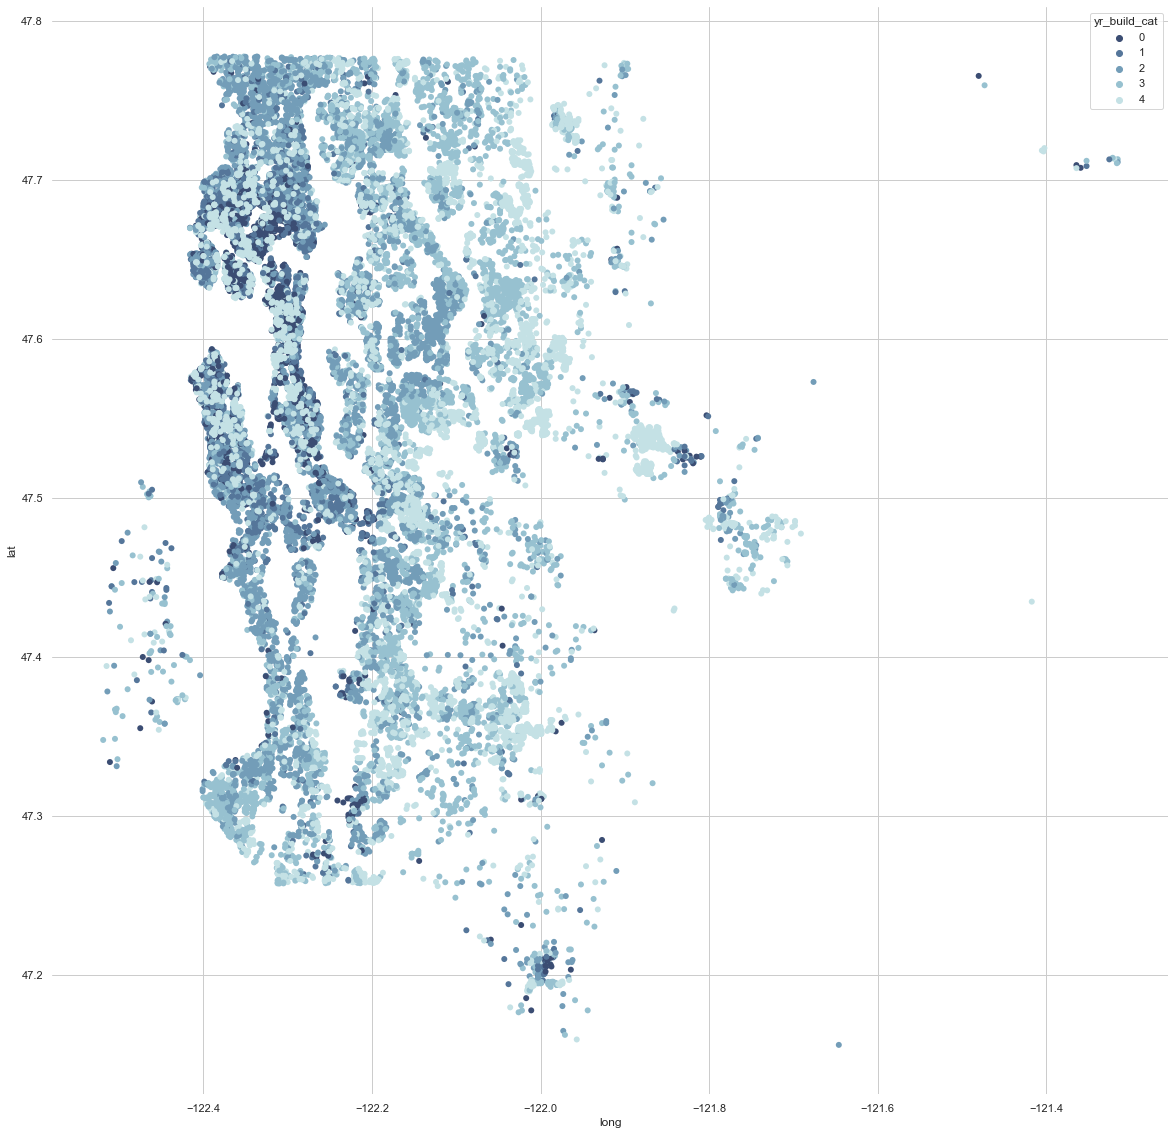

In [305]:
##sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(20, 20))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="long", y="lat",
                hue="yr_build_cat",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

what about the relationship between sqft and price/sqft. 

Is there an area where houses have been renovated already?

Lets take a look at the bedrooms and bathrooms: can they be used as predictors for a poor nerighbourhood?

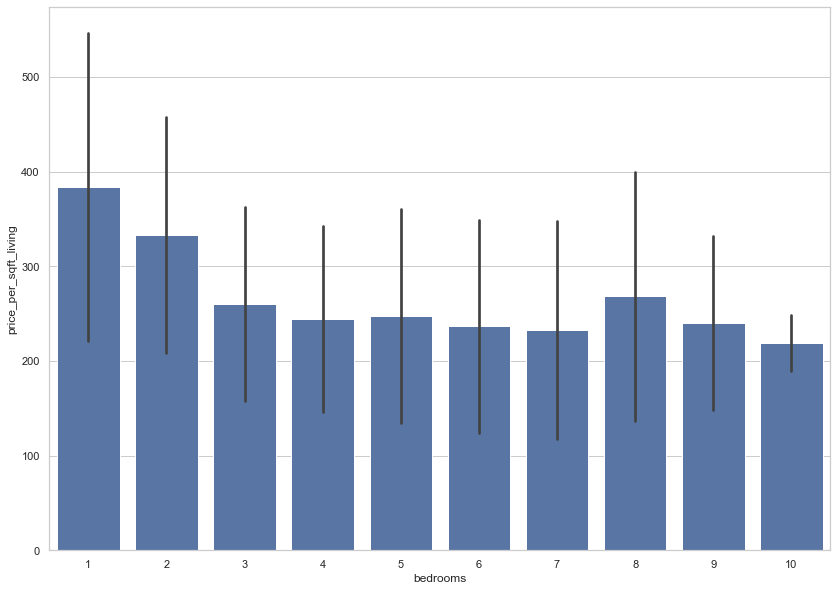

In [306]:
plt.figure(figsize=(14, 10))

# plot a bar chart
g = sns.barplot(
    x="bedrooms", 
    y="price_per_sqft_living", 
    data=df[df['bedrooms']<11], 
     
    ci='sd', 
    color='b')


Lets get rid of the outliers 11 and 33, since there seems to be only one value for them. 

The number of bedrooms it not a good predictor for the price. for houses with more than 3 rooms, the price tends to be cheaper, compared to houses with only 1 or 2 bedrooms.

What about bathrooms?

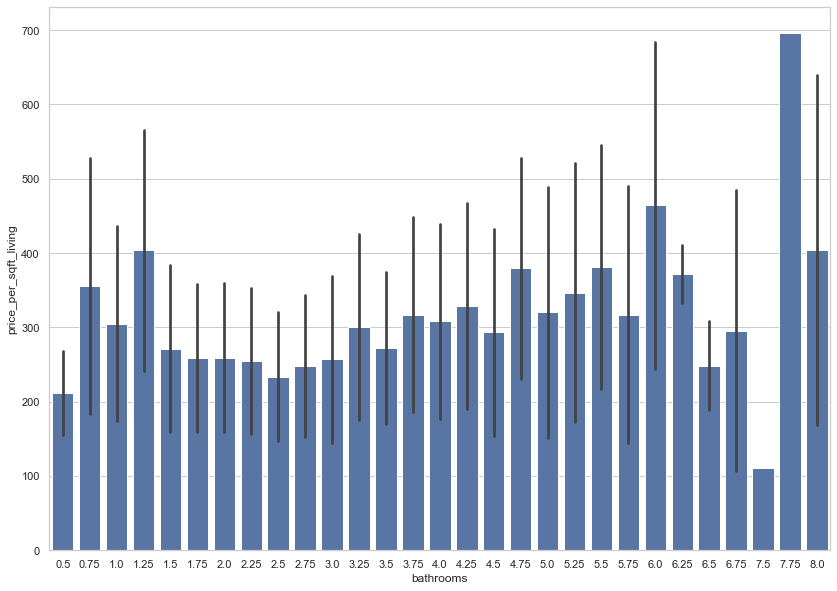

In [307]:
plt.figure(figsize=(14, 10))

# plot a bar chart
g = sns.barplot(
    x="bathrooms", 
    y="price_per_sqft_living", 
    data=df[df['bedrooms']<11], 
     
    ci='sd', 
    color='b')

... mh not really

What happens if we plot the number of bedrooms against the sqft living

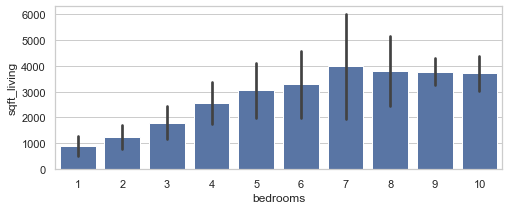

In [308]:
plt.figure(figsize=(8, 3))

# plot a bar chart
g = sns.barplot(
    x="bedrooms", 
    y="sqft_living", 
    data=df[df['bedrooms']<11], 
     
    ci='sd', 
    color='b')

with 7, 8, 9, 10 bedrooms the sqft_living stays the same... one would expect that the number keeps growing.

does it have to do with the price?

In [309]:
#df['50price'] = pd.cut(df.price, bins=2, right=True, labels=False, retbins=False, precision=3, include_lowest=True, duplicates='raise', ordered=True)
df['price_per_sqft_living_below_mean'] = pd.Series(df['price_per_sqft_living'] < df.price_per_sqft_living.mean())

df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
0      5650     1.0         NaN   0.0  ...    98178  47.5112 -122.257   
1      7242     2.0         0.0   0.0  ...    98125  47.7210 -122.319   
2     10000     1.0         0.0   0.0  ...    98028  47.7379 -122.233   
3      5000     1.0         0.0   0.0  ...    98136  47.5208 -122.393   
4      8080     1.0         0.0   0.0  ...    98074  47.6168 -122.045   

  sqft_living15  sqft_lot15  price_per_sqft_living  \
0          1340        5650             188.050847   
1          1690        7639             209.338521   
2          2720        8062             233.766234   
3          1360        5000             308.163265   
4          1800        7503             303.571429   

   price_per_sqft_living_wider_category  renovated  yr_build_cat  \
0                                     0        0.0             2   
1                                     0        1.0             2   
2                                     0        NaN             1   
3                                     1        0.0             2   
4                                     1        0.0             3   

   price_per_sqft_living_below_mean  
0                              True  
1                              True  
2                              True  
3                             False  
4                             False  

[5 rows x 26 columns]

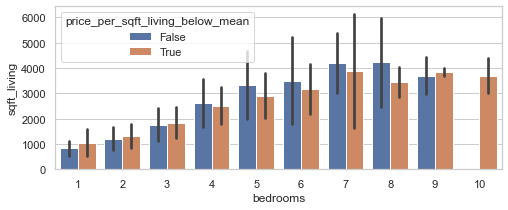

In [310]:
plt.figure(figsize=(8, 3))

# plot a bar chart
g = sns.barplot(
    x="bedrooms", 
    y="sqft_living", 
    hue='price_per_sqft_living_below_mean',
    data=df[df['bedrooms']<11], 
     
    ci='sd', 
    #color='b' 
    )

I do not see a strong difference between the cheaper and expensive houses...

I will make a bar plot based on the the different. anhand der fehlerbalken kann man ja sehen, dass die zipcodes keine grossen abweichungen in ihren mittelwerten haben!!!

So: group by the zipcodes 

In [313]:
#making a new dataframe grouped by the zipped codes and taking the mean of the price
df_edit6 = df.groupby('zipcode').price_per_sqft_living.mean()
df_encode = pd.DataFrame({'price_per_sqft_living_mean_zip':df_edit6.index, 'price_per_sqft_living_mean':df_edit6.values})
#now I want to replace the values in zipcoe_for_cat mit den mean werten des zipcodes
df['price_per_sqft_living_mean_zip'] = df.zipcode
#create a dictionary to encode the zipcodes with the mean values.
rename_dict = df_encode.set_index('price_per_sqft_living_mean_zip').to_dict()['price_per_sqft_living_mean']
#this dictionary contains each mean price for each dict. 

df_edit7 =df

df_edit7 = df_edit7.replace(rename_dict)
df_edit7.zipcode


0        189.172528
1        282.680191
2        225.145368
3        337.245108
4        265.686627
            ...    
21592    369.882756
21593    225.496990
21594    312.285969
21595    251.586071
21596    312.285969
Name: zipcode, Length: 21597, dtype: float64

The previous step was unnecessary...

In [455]:
df.price_per_sqft_living_wider_category

array([0, 1, 3, 2])

<function matplotlib.pyplot.show(close=None, block=None)>

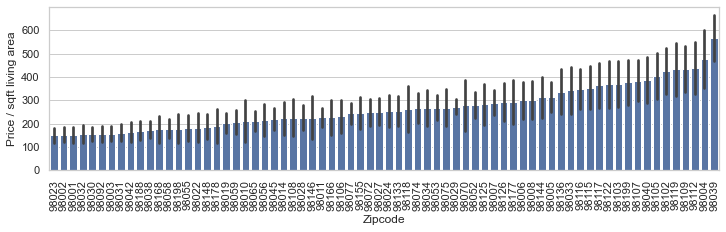

In [501]:
#result = df.groupby(['zipcode'])['price_per_sqft_living'].aggregate(np.median).reset_index()
# pd_df = pd_df.sort_values('Count').reset_index()
#df_sort = df.sort_values('price_per_sqft_living').reset_index()
order = df.groupby(["zipcode"])["price_per_sqft_living"].mean().sort_values().index

plt.figure(figsize=(12, 3))

f = sns.barplot(
    x="zipcode", 
    y="price_per_sqft_living", 
    data=df_sort, 
    order=order,
    ci='sd', 
    color='b')

f.set_xticklabels(f.get_xticklabels(),rotation = 90)
f.set(xlabel='Zipcode', ylabel='Price / sqft living area')
plt.show

Lets look again at the renovation data: we already plotted where a renovation took place, and where not:

/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


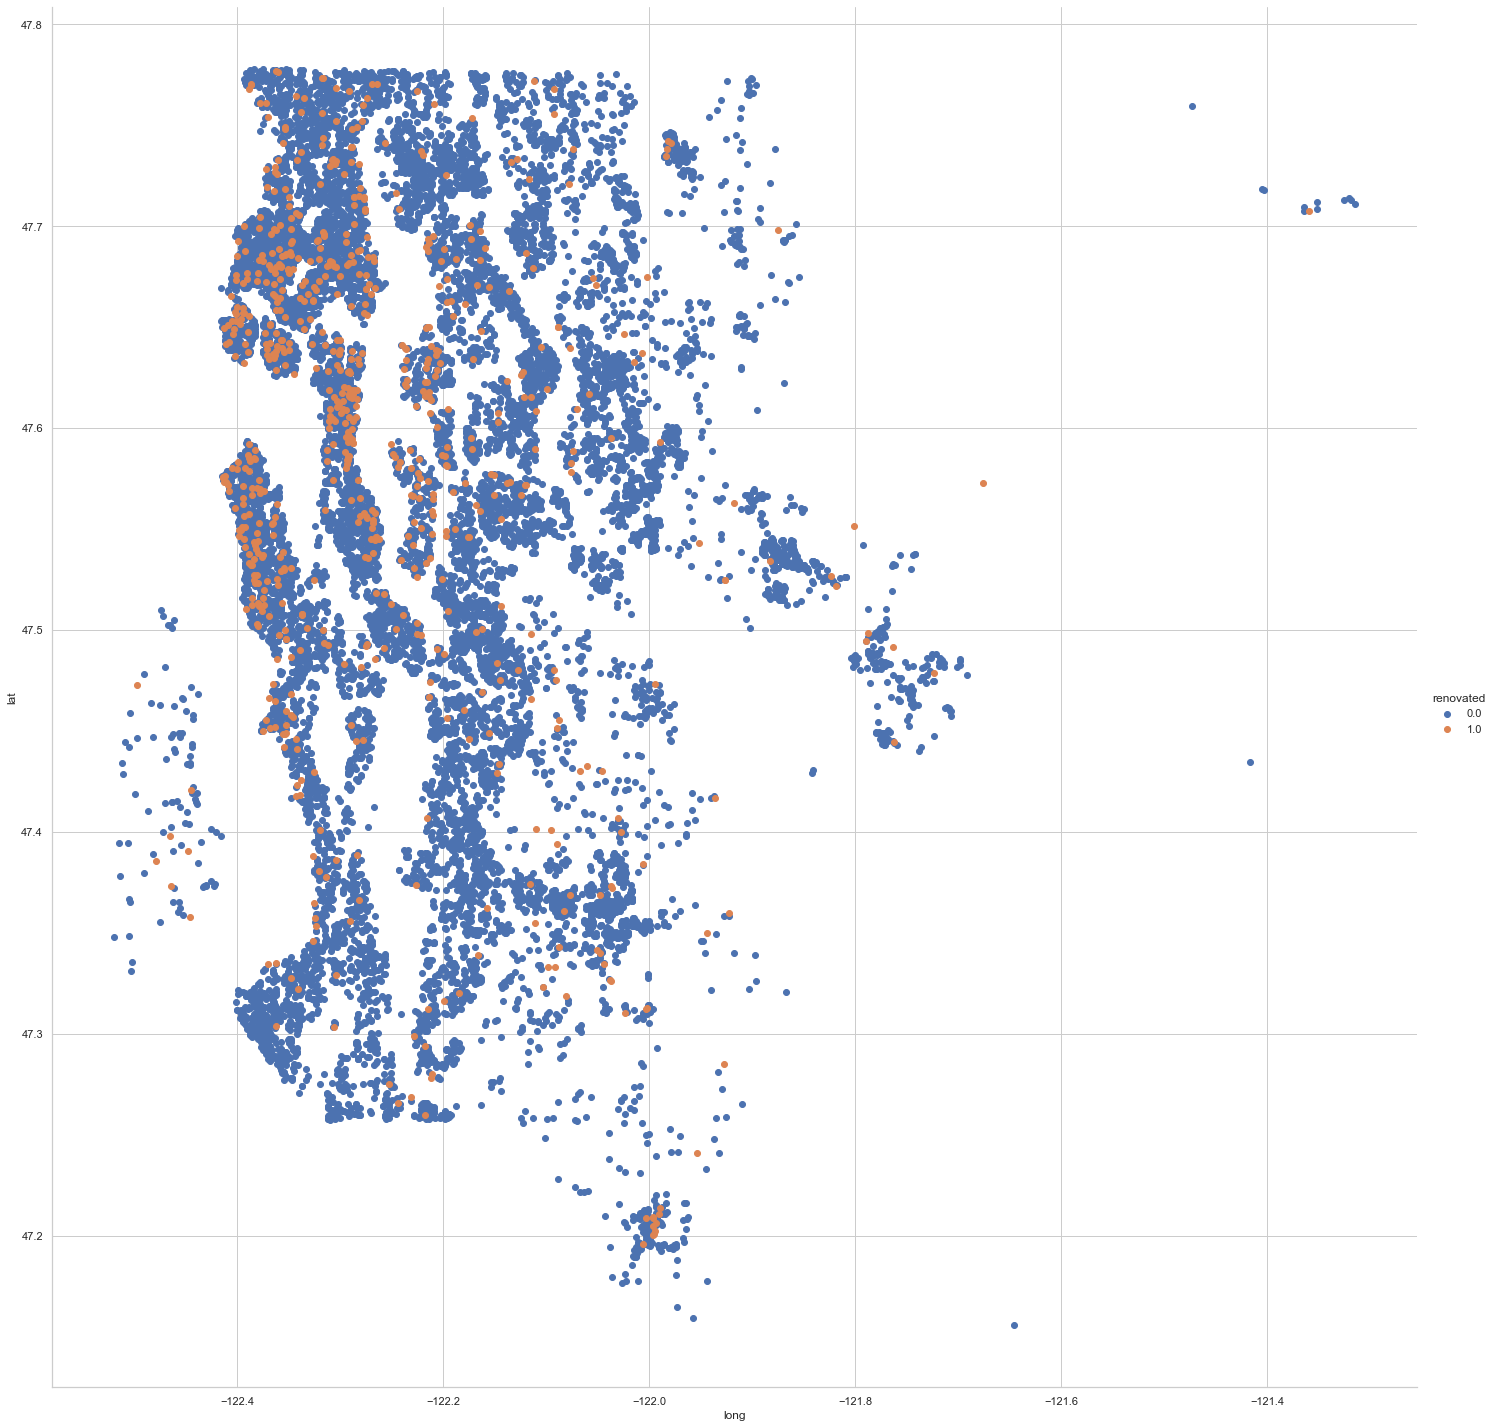

In [329]:
g = sns.FacetGrid(df, hue="renovated",size=20)
g.map(plt.scatter, "long", "lat")
g.add_legend()

Most of the renovations happen in the richer areas

Lets check again the distibution of renovations:

<AxesSubplot:ylabel='Frequency'>

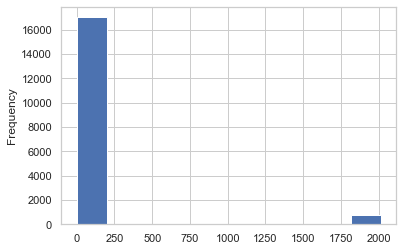

In [330]:
df.yr_renovated.plot(kind='hist')

How many houses of the non-renovated houses are new? maybe there are houses, which have not been renovated, but their grade is not bad and they are not new, and they are not too expensive

<AxesSubplot:ylabel='Frequency'>

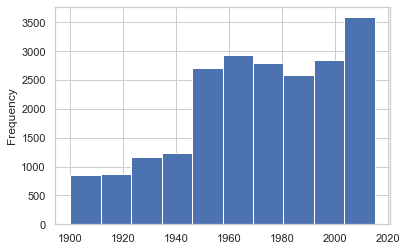

In [331]:
df.yr_built.plot(kind='hist')

Does the yr_built correlate with the grade of the house?

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9')]

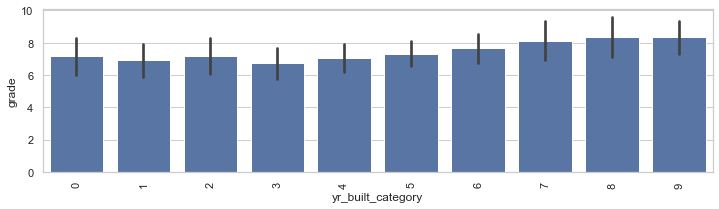

In [341]:
df['yr_built_category'] = pd.cut(df.yr_built, bins=10, right=True, labels=False, retbins=False, precision=3, include_lowest=True, duplicates='raise', ordered=True)


plt.figure(figsize=(12, 3))

# plot a bar chart
g = sns.barplot(
    x="yr_built_category", 
    y="grade", 
    data=df, 
     
    ci='sd', 
    color='b')


The yr_built does not seem to correlate with the grade of the house

<AxesSubplot:ylabel='Frequency'>

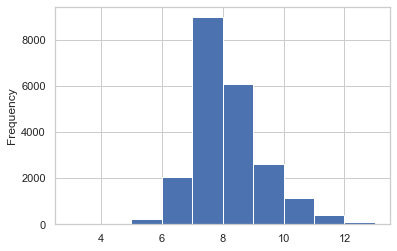

In [342]:
df.grade.plot(kind='hist')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='grade', ylabel='price_per_sqft_living'>

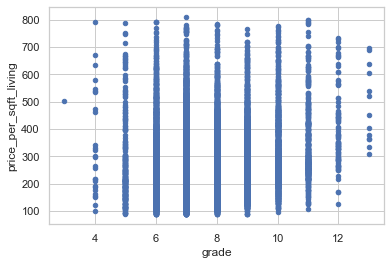

In [345]:
df.plot(kind='scatter', x='grade',y='price_per_sqft_living')

How are sqft and grade correlated?

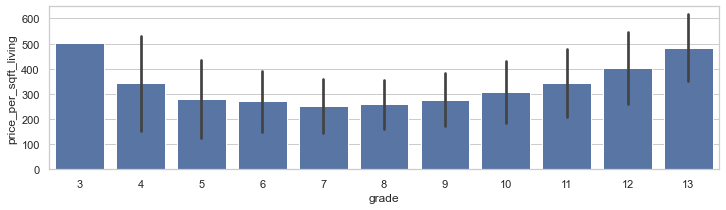

In [346]:
plt.figure(figsize=(12, 3))

# plot a bar chart
g = sns.barplot(
    x="grade", 
    y="price_per_sqft_living", 
    data=df, 
     
    ci='sd', 
    color='b')

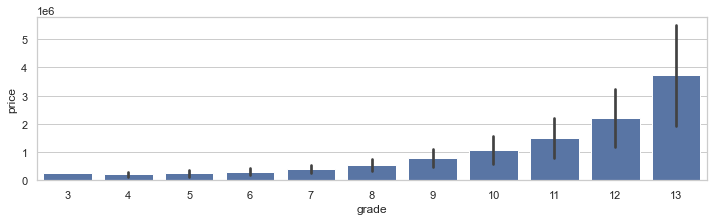

In [347]:
plt.figure(figsize=(12, 3))

# plot a bar chart
g = sns.barplot(
    x="grade", 
    y="price", 
    data=df, 
     
    ci='sd', 
    color='b')

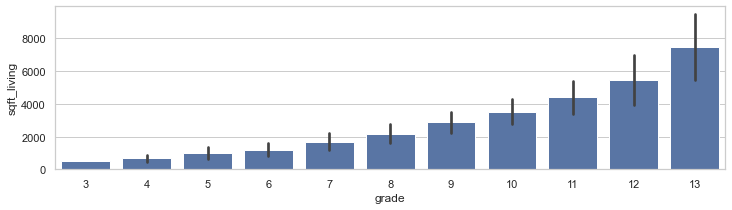

In [348]:
plt.figure(figsize=(12, 3))

# plot a bar chart
g = sns.barplot(
    x="grade", 
    y="sqft_living", 
    data=df, 
     
    ci='sd', 
    color='b')

Somehow the grade of the house is correlated to the sqft_living. so the bigger the house the better the grading. 

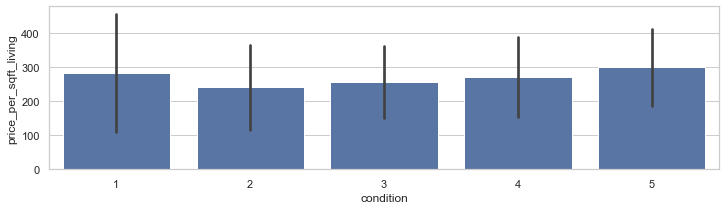

In [350]:
plt.figure(figsize=(12, 3))

# plot a bar chart
g = sns.barplot(
    x="condition", 
    y="price_per_sqft_living", 
    data=df, 
     
    ci='sd', 
    color='b')

The condition of the house does not seem to correlate with the price per sqft living

/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


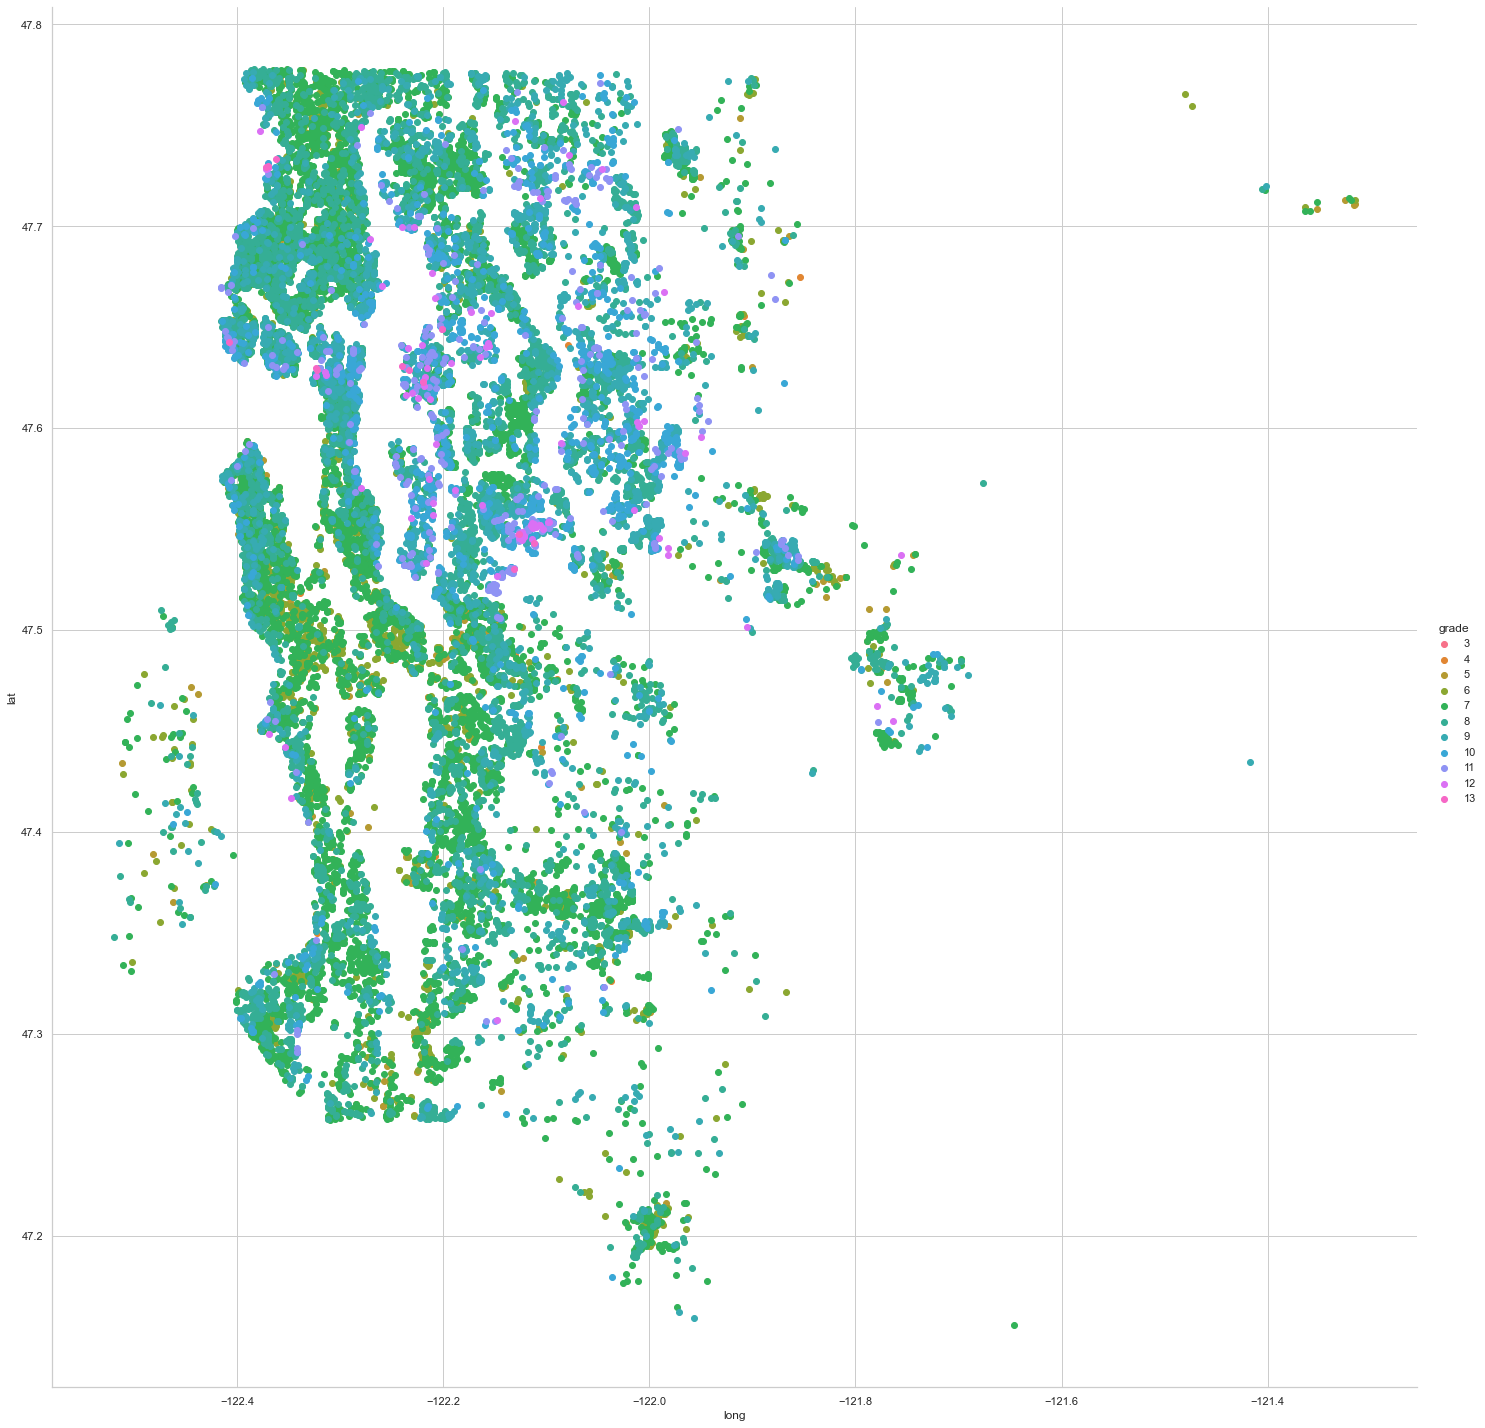

In [351]:
g = sns.FacetGrid(df, hue="grade",size=20)
g.map(plt.scatter, "long", "lat")
g.add_legend()

In [479]:
df['grade4'] =pd.Series(df.grade==4)
df["grade4"] = df["grade4"]*1 +1
df["grade4"] = df["grade4"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   id                                    21597 non-null  int64   
 1   date                                  21597 non-null  object  
 2   price                                 21597 non-null  float64 
 3   bedrooms                              21597 non-null  int64   
 4   bathrooms                             21597 non-null  float64 
 5   sqft_living                           21597 non-null  int64   
 6   sqft_lot                              21597 non-null  int64   
 7   floors                                21597 non-null  float64 
 8   waterfront                            19221 non-null  float64 
 9   view                                  21534 non-null  float64 
 10  condition                             21597 non-null  int64   
 11  gr

/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


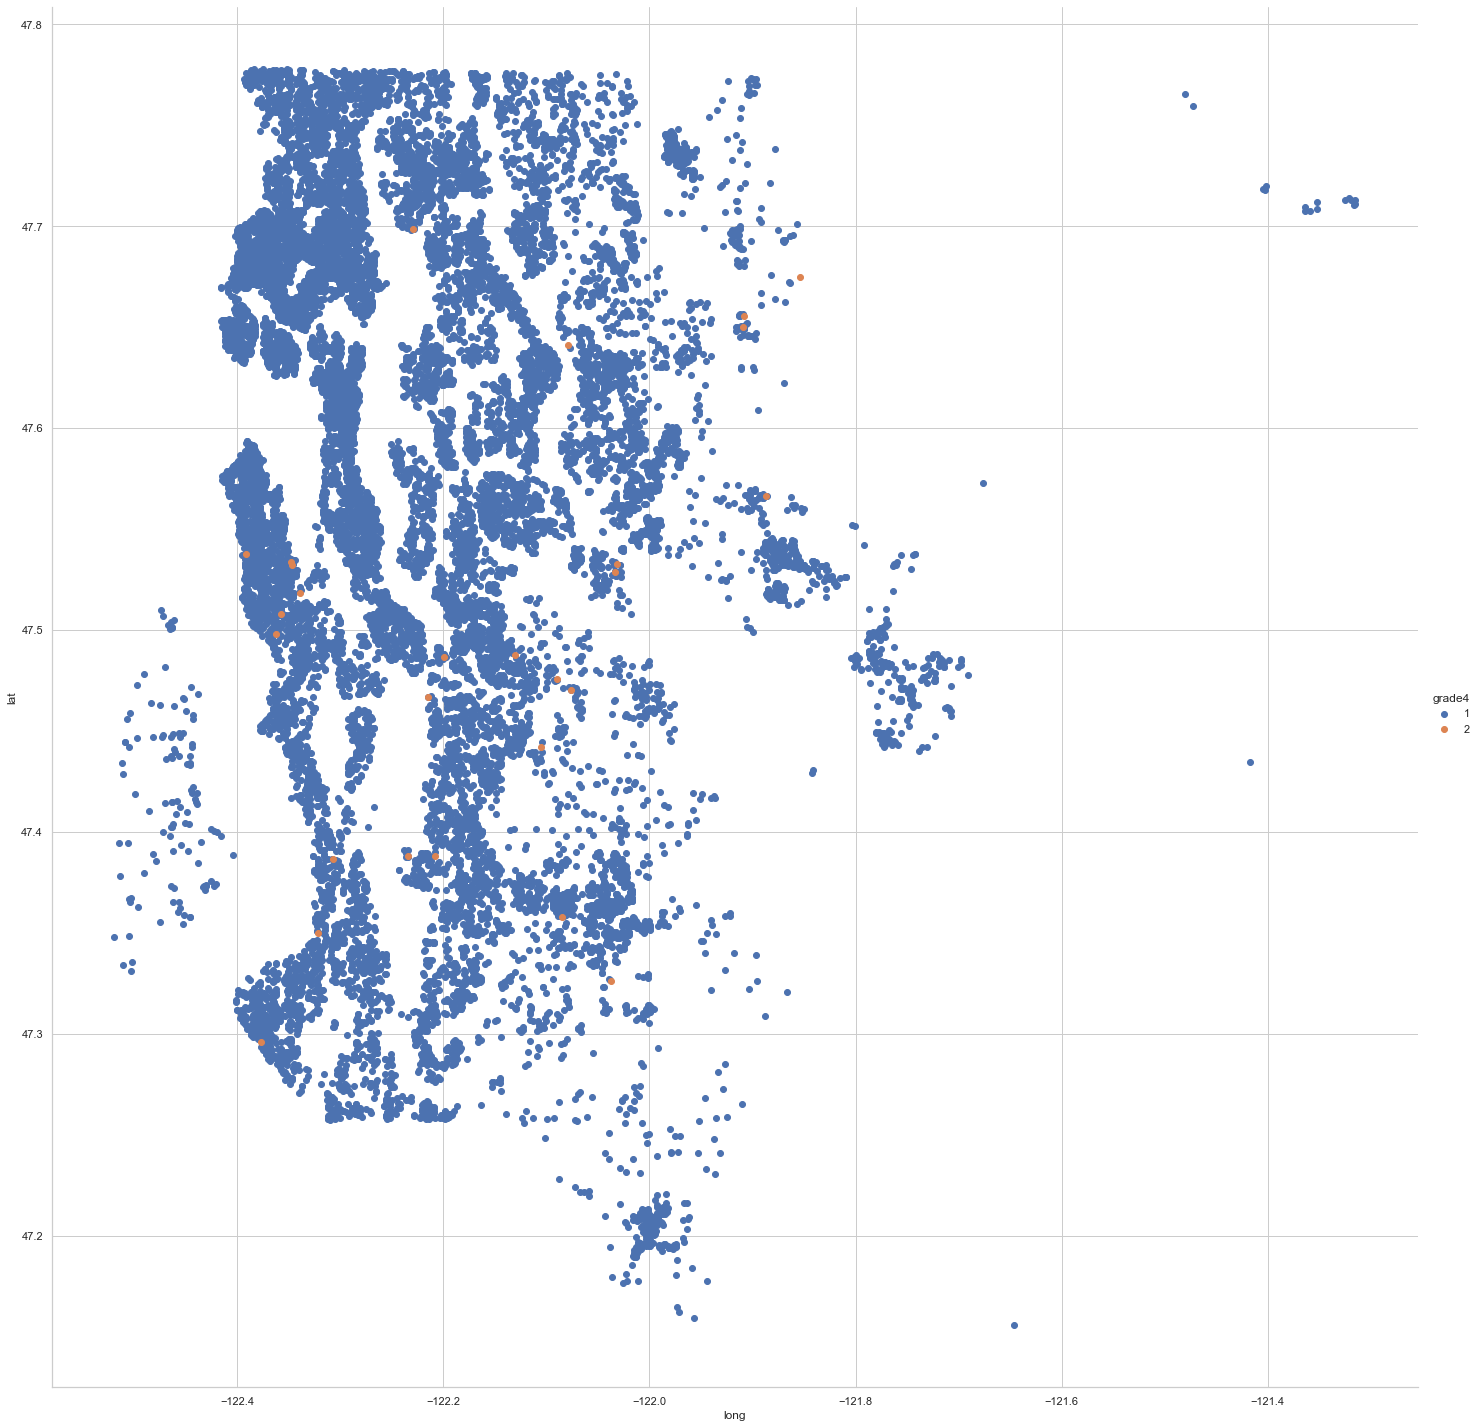

In [481]:
g = sns.FacetGrid(df, hue="grade4",size=20)
g.map(plt.scatter, "long", "lat")
g.add_legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>

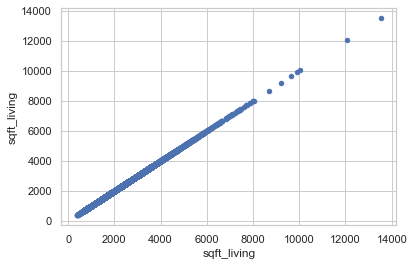

In [ ]:
df.plot(kind='scatter',x='sqft_living', y='sqft_living')

<AxesSubplot:xlabel='long', ylabel='lat'>

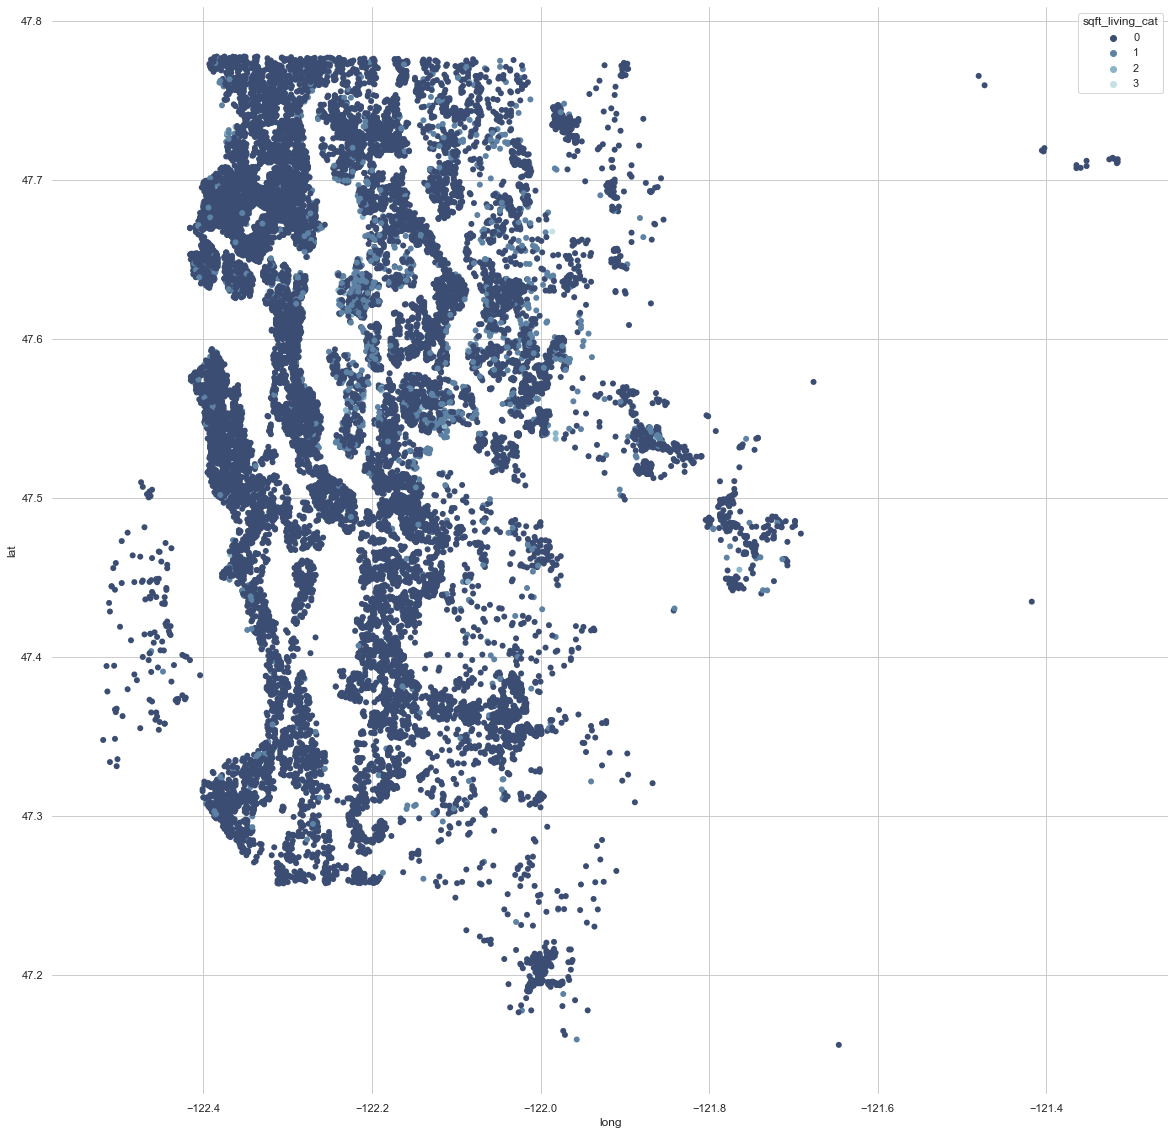

In [357]:
df['sqft_living_cat']=pd.cut(df.sqft_living, bins=4, right=True, labels=False, retbins=False, precision=3, include_lowest=True, duplicates='raise', ordered=True)

f, ax = plt.subplots(figsize=(20, 20))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="long", y="lat",
                hue="sqft_living_cat",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

okay, ja grade und square foot living sind fast gleich...

<AxesSubplot:ylabel='Frequency'>

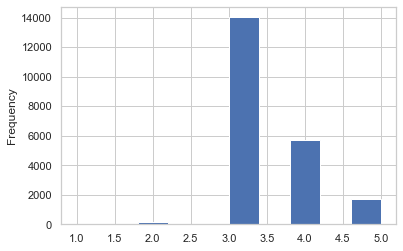

In [360]:
df.condition.plot(kind='hist')

/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


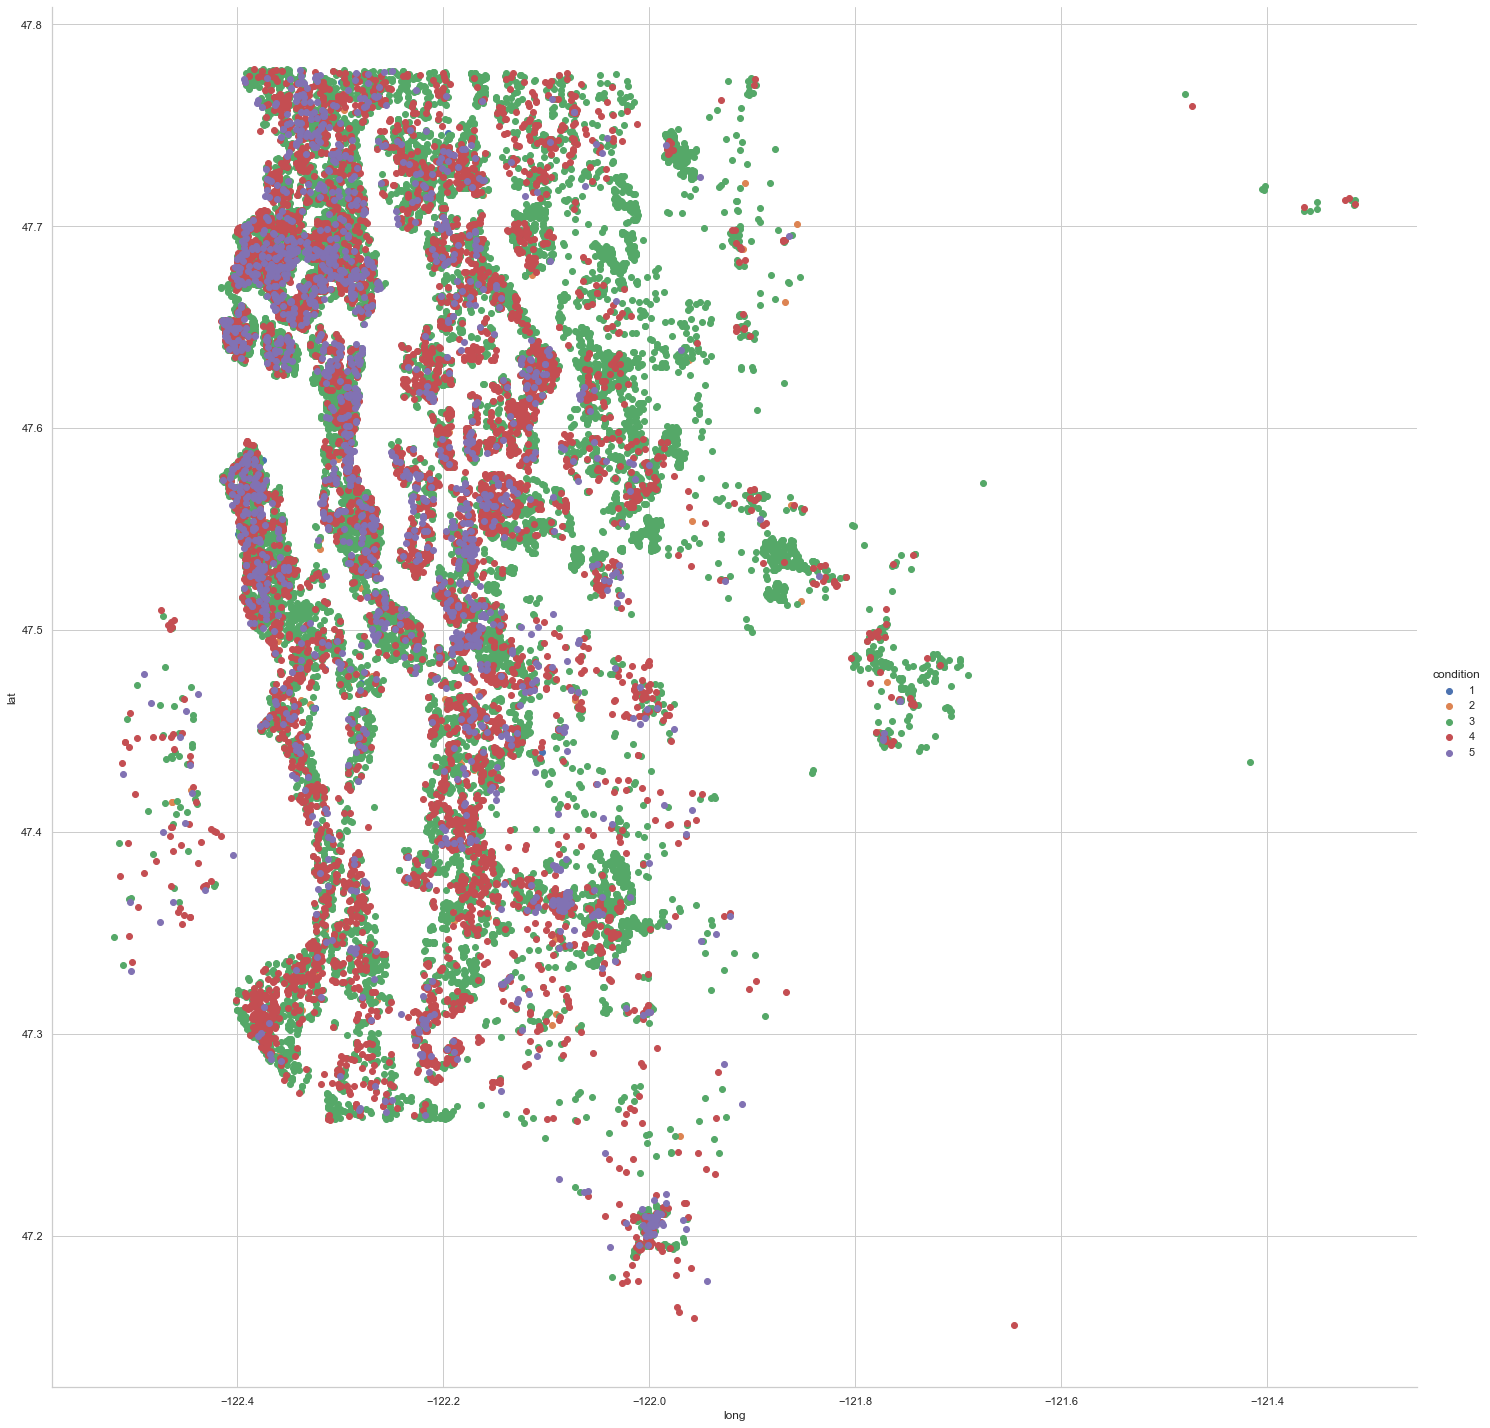

In [358]:
g = sns.FacetGrid(df, hue="condition",size=20)
g.map(plt.scatter, "long", "lat")
g.add_legend()

andere Farben:

<AxesSubplot:xlabel='long', ylabel='lat'>

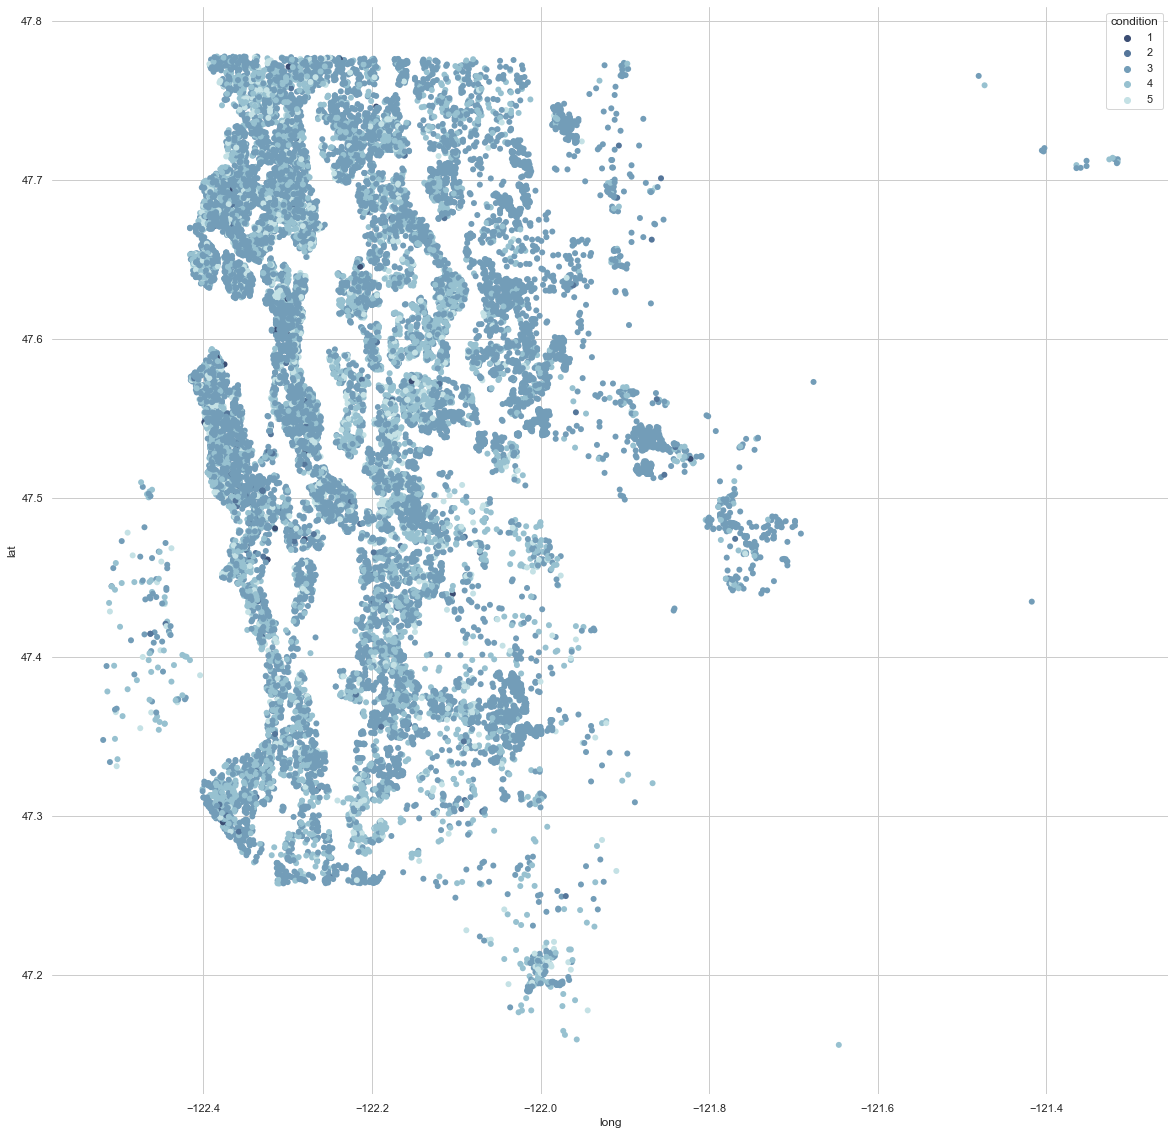

In [365]:
df['sqft_living_cat']=pd.cut(df.sqft_living, bins=4, right=True, labels=False, retbins=False, precision=3, include_lowest=True, duplicates='raise', ordered=True)

f, ax = plt.subplots(figsize=(20, 20))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="long", y="lat",
                
                hue="condition",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

How many houses of the non-renovated houses are new? maybe there are houses, which have not been renovated, but their grade is not bad and they are not new, and they are not too expensive

In [407]:
#turn yr_buid_cat to a category, to plot it better
df['yr_build_cat'] = df.yr_build_cat.astype('category')
df['yr_built_category'] = df.yr_built_category.astype('category')



year_build Distribution of the houses that were not renovated

<AxesSubplot:xlabel='yr_built_category', ylabel='Count'>

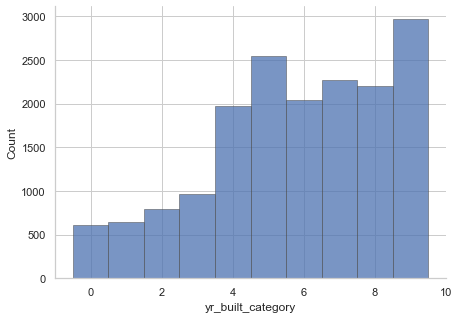

In [408]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(
    df.query('yr_renovated <1'),
    x='yr_built_category', 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)


looks expected. The newer houses do not need a renovation.

<AxesSubplot:xlabel='yr_built_category', ylabel='Count'>

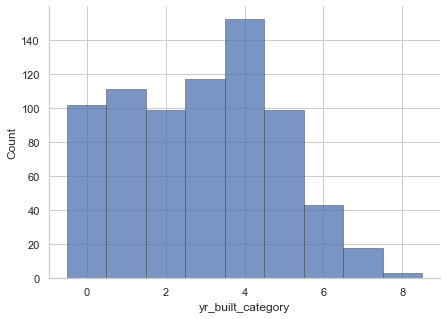

In [410]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(
    df.query('yr_renovated >1'),
    x='yr_built_category', 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)

These are the renovated houses. Especially houses in the yr_build_cat 0-5 (old houses) were renovated. especially group 4 seems to are being renovted. What are these houses?

In [413]:
df.query('yr_built_category == 4').yr_built.describe()

count    2584.000000
mean     1951.947368
std         3.129100
min      1947.000000
25%      1949.000000
50%      1952.000000
75%      1955.000000
max      1957.000000
Name: yr_built, dtype: float64

These houses were built between 1947 and 1957. 
Where are these houses on a map?

In [428]:
df['yr_cat_4'] = pd.Series(df['yr_built_category'] == 4)
df['yr_cat_4'] = df['yr_cat_4'].fillna(0)

/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


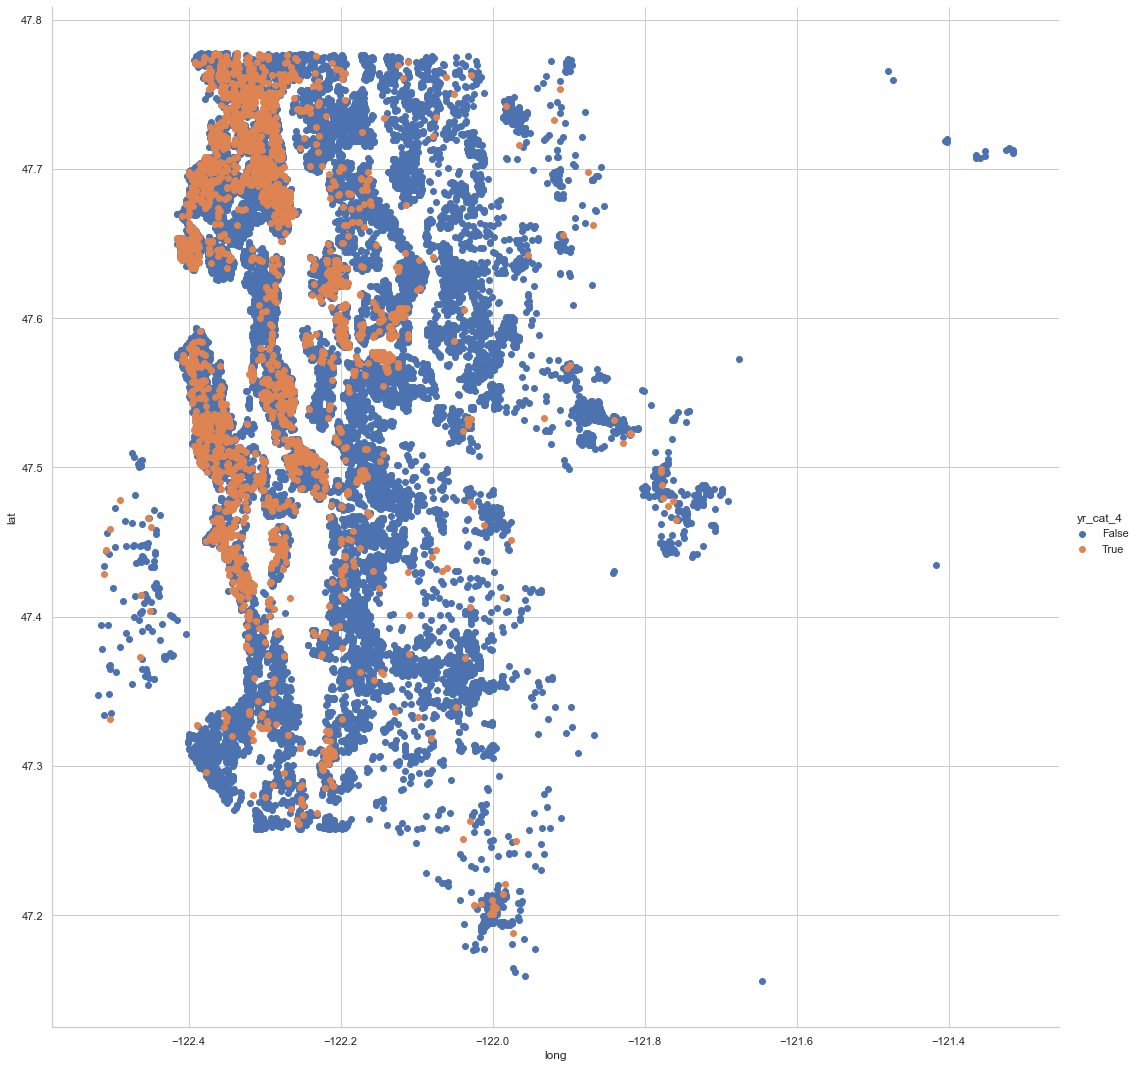

In [429]:
g = sns.FacetGrid(df, hue="yr_cat_4",size=15)
g.map(plt.scatter, "long", "lat")
g.add_legend()

These are houses that were built between 1947 and 1957. currently, there are many houses from that area that are renovated right now. The hypothesis is, that these houses might be profitable to renovate. Lets check the condition of these houses, before and after rennovation. 

<AxesSubplot:ylabel='Frequency'>

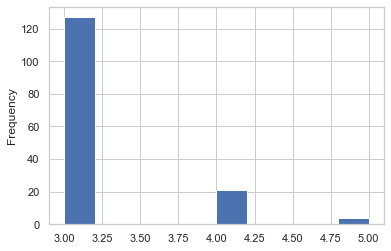

In [432]:
df.query('yr_renovated >1 and yr_built_category ==4').condition.plot(kind='hist')

These are the condition of the houses that have been renovated and where built between 1947 and 1957. 

<AxesSubplot:ylabel='Frequency'>

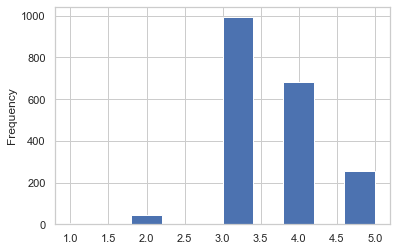

In [433]:
df.query('yr_renovated <1 and yr_built_category ==4').condition.plot(kind='hist')

These are the condition of the houses that have NOT been renovated and where built between 1947 and 1957. 

Lets only include houses with lower price/sqft_licing catergory:

<AxesSubplot:ylabel='Frequency'>

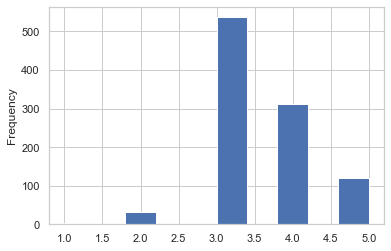

In [445]:

df.query('yr_renovated <1 and yr_built_category ==4 and price_per_sqft_living_wider_category == 0').condition.plot(kind='hist')


Where are the houses located that yr_renovated <1 and yr_built_category ==4 and price_per_sqft_living_wider_category == 0 and condition >=3 and condition <=4

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   id                                    21597 non-null  int64   
 1   date                                  21597 non-null  object  
 2   price                                 21597 non-null  float64 
 3   bedrooms                              21597 non-null  int64   
 4   bathrooms                             21597 non-null  float64 
 5   sqft_living                           21597 non-null  int64   
 6   sqft_lot                              21597 non-null  int64   
 7   floors                                21597 non-null  float64 
 8   waterfront                            19221 non-null  float64 
 9   view                                  21534 non-null  float64 
 10  condition                             21597 non-null  int64   
 11  gr

In [452]:
#create category
df['yr_r_yr_b_pr_per_sqft_cond'] = pd.Series(df.query('yr_renovated <1 and yr_built_category ==4 and price_per_sqft_living_wider_category == 0 and condition >=3 and condition <=4'))

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

/Users/clemensbretscher/neuefische/ds-linear-regression/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


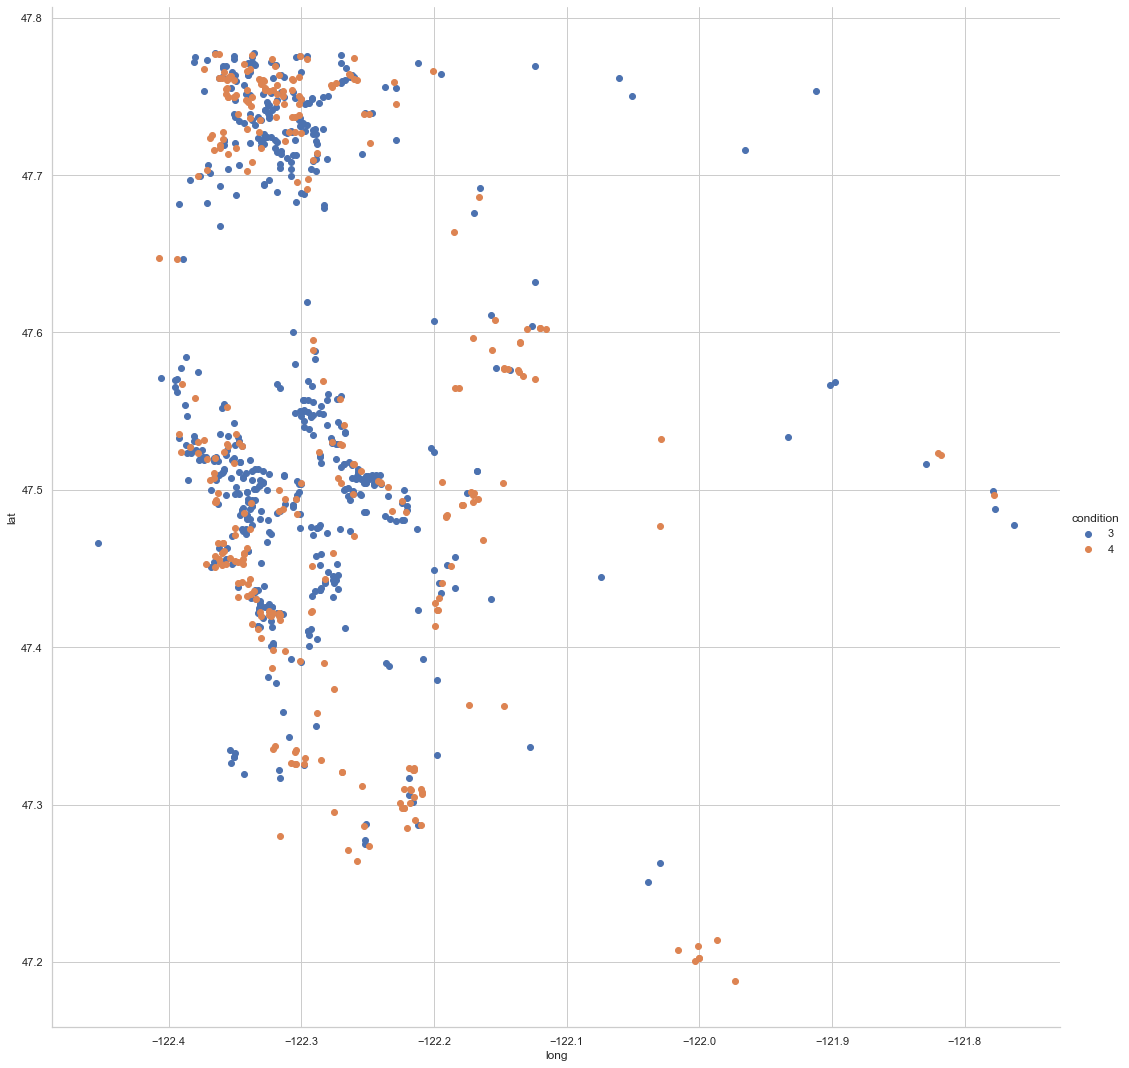

In [449]:
g = sns.FacetGrid(df.query('yr_renovated <1 and yr_built_category ==4 and price_per_sqft_living_wider_category == 0 and condition >=3 and condition <=4'), hue="condition",size=15)
g.map(plt.scatter, "long", "lat")
g.add_legend()

There must a relationship between the Price /sqft living and the latidue of the house:

In [ ]:
plt.figure(figsize=(4, 5))

# plot a bar chart
b = sns.barplot(
    x="lat", 
    y="price_per_sqft_living", 
    data=df, 
     
    ci='sd', 
    color='lightblue')
b.set_xlabel("Latitude",fontsize=15)
b.set_ylabel("Price / sqft Living Area",fontsize=15)
b.tick_params(labelsize=10)

<AxesSubplot:xlabel='lat', ylabel='price_per_sqft_living'>

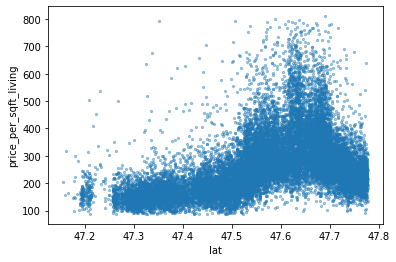

In [11]:
df.plot(kind='scatter', x='lat',y='price_per_sqft_living', s=5, alpha=0.4)

In [17]:
df['lat_cat']=pd.cut(df.lat, bins=8, right=True, labels=False, retbins=False, precision=3, include_lowest=True, duplicates='raise', ordered=True)

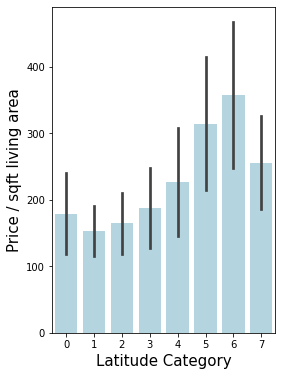

In [24]:
plt.figure(figsize=(4, 6))

# plot a bar chart
b = sns.barplot(
    x="lat_cat", 
    y="price_per_sqft_living", 
    data=df, 
     
    ci='sd', 
    color='lightblue')

b.set_xlabel("Latitude Category",fontsize=15)
b.set_ylabel("Price / sqft living area",fontsize=15)
b.tick_params(labelsize=10)

In [6]:
smf.ols(formula='price_per_sqft_living ~ lat', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     price_per_sqft_living   R-squared:                       0.223
Model:                               OLS   Adj. R-squared:                  0.223
Method:                    Least Squares   F-statistic:                     6207.
Date:                   Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                           12:06:55   Log-Likelihood:            -1.2943e+05
No. Observations:                  21597   AIC:                         2.589e+05
Df Residuals:                      21595   BIC:                         2.589e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.758e+04    226.456    -77.621      0.000    -1.8e+04   -1.71e+04
lat          375.1432      4.761     78.788      0.000     365.810     384.476
==============================================================================
Omnibus:                     5972.407   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17956.421
Skew:                           1.435   Prob(JB):                         0.00
Kurtosis:                       6.423   Cond. No.                     1.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#sns.lmplot(x="lat", y="price_per_sqft_living", data=df, ci='sd', palette="muted", scatter_kws={"s": 50, "alpha": 1})